In [ ]:
!pip install optuna
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00


# Download Kaggle Dataset

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c march-machine-learning-mania-2025

 82% 28.0M/34.1M [00:00<00:00, 97.1MB/s]
100% 34.1M/34.1M [00:00<00:00, 91.1MB/s]


In [ ]:
import zipfile

DATA_PATH = "march-machine-learning-mania-2025.zip"
EXTRACT_PATH = "march_madness_data"

with zipfile.ZipFile(DATA_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

# Verify extracted files
import os
print("Extracted files:", os.listdir(EXTRACT_PATH))

Extracted files: ['WTeamSpellings.csv', 'MRegularSeasonDetailedResults.csv', 'WRegularSeasonDetailedResults.csv', 'MSecondaryTourneyTeams.csv', 'MNCAATourneySeeds.csv', 'MSecondaryTourneyCompactResults.csv', 'WNCAATourneySeeds.csv', 'Cities.csv', 'MConferenceTourneyGames.csv', 'WNCAATourneySlots.csv', 'WSeasons.csv', 'SampleSubmissionStage2.csv', 'WConferenceTourneyGames.csv', 'MRegularSeasonCompactResults.csv', 'WTeamConferences.csv', 'MNCAATourneySlots.csv', 'MTeamConferences.csv', 'MTeamSpellings.csv', 'SeedBenchmarkStage1.csv', 'MGameCities.csv', 'Conferences.csv', 'MNCAATourneyCompactResults.csv', 'MTeamCoaches.csv', 'MSeasons.csv', 'WNCAATourneyDetailedResults.csv', 'MMasseyOrdinals.csv', 'WSecondaryTourneyTeams.csv', 'WRegularSeasonCompactResults.csv', 'MNCAATourneyDetailedResults.csv', 'MTeams.csv', 'WGameCities.csv', 'WNCAATourneyCompactResults.csv', 'MNCAATourneySeedRoundSlots.csv', 'WSecondaryTourneyCompactResults.csv', 'WTeams.csv', 'SampleSubmissionStage1.csv']


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)


# Season Results

In [ ]:
import pandas as pd
import os

DATA_PATH = "march_madness_data/"

df_season_results = pd.concat([
    pd.read_csv(DATA_PATH + "MRegularSeasonDetailedResults.csv"),
    pd.read_csv(DATA_PATH + "WRegularSeasonDetailedResults.csv"),
], ignore_index=True)

df_season_results.drop(['NumOT'], axis=1, inplace=True)
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [ ]:
df_season_results['WLoc'] = df_season_results['WLoc'].map({'A': 1, 'H': 2, 'N': 3})
df_season_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,3,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,3,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,3,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,3,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,3,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200585,2025,131,3471,75,3413,66,1,26,62,4,19,19,28,8,31,10,11,6,1,20,24,67,9,29,9,14,9,26,14,10,6,5,22
200586,2025,132,3192,66,3476,49,2,23,55,3,21,17,18,10,22,11,9,8,1,8,21,57,4,20,3,4,14,22,14,17,4,1,17
200587,2025,132,3250,74,3119,62,2,27,45,5,14,15,17,5,25,15,15,6,0,12,25,56,6,17,6,10,8,13,10,10,5,0,20
200588,2025,132,3293,83,3125,62,3,28,54,14,28,13,15,5,33,21,13,2,3,15,24,68,2,21,12,14,12,22,11,7,5,0,16


## Score Diff

In [ ]:
df_season_results['ScoreDiff'] = df_season_results['WScore'] - df_season_results['LScore']

## Possession Totals

In [ ]:
df_season_results['WPOSS'] = (df_season_results['WFGA'] + (0.475 * df_season_results['WFTA']) - df_season_results['WOR'] + df_season_results['WTO'])
df_season_results['LPOSS'] = (df_season_results['LFGA'] + (0.475 * df_season_results['LFTA']) - df_season_results['LOR'] + df_season_results['LTO'])

## Offensive Rating

In [ ]:
df_season_results['WORtg'] = (df_season_results['WScore'] / df_season_results['WPOSS']) * 100
df_season_results['LORtg'] = (df_season_results['LScore'] / df_season_results['LPOSS']) * 100

## Defensive Rating

In [ ]:
df_season_results['WDRtg'] = (df_season_results['LScore'] / df_season_results['LPOSS']) * 100
df_season_results['LDRtg'] = (df_season_results['WScore'] / df_season_results['WPOSS']) * 100

## Net Rating

In [ ]:
df_season_results['WNRtg'] = df_season_results['WORtg'] - df_season_results['WDRtg']
df_season_results['LNRtg'] = df_season_results['LORtg'] - df_season_results['LDRtg']

## Pts per Possession

In [ ]:
df_season_results['WPTSPOSS'] = (df_season_results['WScore'] / df_season_results['WPOSS'])
df_season_results['LPTSPOSS'] = df_season_results['LScore'] / df_season_results['LPOSS']

## Effective Field Goal Percentage

In [ ]:
df_season_results['WEFG'] = (df_season_results['WFGM'] + (0.5 * df_season_results['WFGM3'])) / df_season_results['WFGA']
df_season_results['LEFG'] = (df_season_results['LFGM'] + (0.5 * df_season_results['LFGM3'])) / df_season_results['LFGA']

## Free Throw Rate

In [ ]:
df_season_results['WFTR'] = df_season_results['WFTA'] / df_season_results['WFGA']
df_season_results['LFTR'] = df_season_results['LFTA'] / df_season_results['LFGA']

## Offensive Rebound Percentage

In [ ]:
df_season_results['WORP'] = df_season_results['WOR'] / (df_season_results['WOR'] + df_season_results['LDR'])
df_season_results['LORP'] = df_season_results['LOR'] / (df_season_results['LOR'] + df_season_results['WDR'])

## True Shooting Percentage

In [ ]:
df_season_results['WTSP'] = df_season_results['WScore'] / (2 * (df_season_results['WFGA'] + (0.44 * df_season_results['WFTA'])))
df_season_results['LTSP'] = df_season_results['LScore'] / (2 * (df_season_results['LFGA'] + (0.44 * df_season_results['LFTA'])))

## Turnover Percentage

In [ ]:
df_season_results['WTOV%'] = df_season_results['WTO'] / (df_season_results['WFGA'] + (0.44 * df_season_results['WFTA']) + df_season_results['WTO'])
df_season_results['LTOV%'] = df_season_results['LTO'] / (df_season_results['LFGA'] + (0.44 * df_season_results['LFTA']) + df_season_results['LTO'])

# Per Season Results

In [ ]:
num_win = df_season_results.groupby(['Season', 'WTeamID']).count()
num_win = num_win.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"})

In [ ]:
num_loss = df_season_results.groupby(['Season', 'LTeamID']).count()
num_loss = num_loss.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "NumLosses", "LTeamID": "TeamID"})

In [ ]:
gap_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
gap_win = gap_win[['Season', 'WTeamID', 'ScoreDiff']].rename(columns={"ScoreDiff": "GapWins", "WTeamID": "TeamID"})

In [ ]:
gap_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
gap_loss = gap_loss[['Season', 'LTeamID', 'ScoreDiff']].rename(columns={"ScoreDiff": "GapLosses", "LTeamID": "TeamID"})

In [ ]:
poss_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
poss_win = poss_win[['Season', 'WTeamID', 'WPOSS']].rename(columns={"WPOSS": "PossWins", "WTeamID": "TeamID"})

In [ ]:
poss_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
poss_loss = poss_loss[['Season', 'LTeamID', 'LPOSS']].rename(columns={"LPOSS": "PossLosses", "LTeamID": "TeamID"})

In [ ]:
off_rating_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
off_rating_win = off_rating_win[['Season', 'WTeamID', 'WORtg']].rename(columns={"WORtg": "OffRatingWins", "WTeamID": "TeamID"})

In [ ]:
off_rating_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
off_rating_loss = off_rating_loss[['Season', 'LTeamID', 'LORtg']].rename(columns={"LORtg": "OffRatingLosses", "LTeamID": "TeamID"})

In [ ]:
def_rating_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
def_rating_win = def_rating_win[['Season', 'WTeamID', 'WDRtg']].rename(columns={"WDRtg": "DefRatingWins", "WTeamID": "TeamID"})

In [ ]:
def_rating_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
def_rating_loss = def_rating_loss[['Season', 'LTeamID', 'LDRtg']].rename(columns={"LDRtg": "DefRatingLosses", "LTeamID": "TeamID"})

In [ ]:
net_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
net_win = net_win[['Season', 'WTeamID', 'WNRtg']].rename(columns={"WNRtg": "NetWins", "WTeamID": "TeamID"})

In [ ]:
net_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
net_loss = net_loss[['Season', 'LTeamID', 'LNRtg']].rename(columns={"LNRtg": "NetLosses", "LTeamID": "TeamID"})

In [ ]:
pts_poss_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
pts_poss_win = pts_poss_win[['Season', 'WTeamID', 'WPTSPOSS']].rename(columns={"WPTSPOSS": "PTSPerPOSSWins", "WTeamID": "TeamID"})

In [ ]:
pts_poss_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
pts_poss_loss = pts_poss_loss[['Season', 'LTeamID', 'LPTSPOSS']].rename(columns={"LPTSPOSS": "PTSPerPOSSLosses", "LTeamID": "TeamID"})

In [ ]:
efg_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
efg_win = efg_win[['Season', 'WTeamID', 'WEFG']].rename(columns={"WEFG": "EFGPerWins", "WTeamID": "TeamID"})

In [ ]:
efg_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
efg_loss = efg_loss[['Season', 'LTeamID', 'LEFG']].rename(columns={"LEFG": "EFGPerLosses", "LTeamID": "TeamID"})

In [ ]:
tsper_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
tsper_win = tsper_win[['Season', 'WTeamID', 'WTSP']].rename(columns={"WTSP": "TSPerWins", "WTeamID": "TeamID"})

In [ ]:
tsper_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
tsper_loss = tsper_loss[['Season', 'LTeamID', 'LTSP']].rename(columns={"LTSP": "TSPerLosses", "LTeamID": "TeamID"})

In [ ]:
ftr_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
ftr_win = ftr_win[['Season', 'WTeamID', 'WFTR']].rename(columns={"WFTR": "FTRPerWins", "WTeamID": "TeamID"})

In [ ]:
ftr_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
ftr_loss = ftr_loss[['Season', 'LTeamID', 'LFTR']].rename(columns={"LFTR": "FTRPerLosses", "LTeamID": "TeamID"})

In [ ]:
toper_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
toper_win = toper_win[['Season', 'WTeamID', 'WTOV%']].rename(columns={"WTOV%": "TOVPerWins", "WTeamID": "TeamID"})

In [ ]:
toper_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
toper_loss = toper_loss[['Season', 'LTeamID', 'LTOV%']].rename(columns={"LTOV%": "TOVPerLosses", "LTeamID": "TeamID"})

In [ ]:
df_features_season_w = df_season_results.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_l = df_season_results.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})

df_features_season = pd.concat([df_features_season_w, df_features_season_l], axis=0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)

df_features_season = df_features_season.merge(num_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(num_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(gap_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(gap_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(efg_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(efg_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(ftr_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(ftr_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(toper_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(toper_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(tsper_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(tsper_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(pts_poss_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(pts_poss_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(net_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(net_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(poss_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(poss_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(off_rating_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(off_rating_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(def_rating_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(def_rating_loss, on=['Season', 'TeamID'], how='left')

# Fil NAs with 0's
df_features_season.fillna(0, inplace=True)

In [ ]:
df_features_season

,Season,TeamID,NumWins,NumLosses,GapWins,GapLosses,EFGPerWins,EFGPerLosses,FTRPerWins,FTRPerLosses,TOVPerWins,TOVPerLosses,TSPerWins,TSPerLosses,PTSPerPOSSWins,PTSPerPOSSLosses,NetWins,NetLosses,PossWins,PossLosses,OffRatingWins,OffRatingLosses,DefRatingWins,DefRatingLosses
0,2003,1102,12.0,16.0,15.583333,11.250000,0.692162,0.503591,0.541714,0.375427,0.182036,0.201436,0.702724,0.533891,1.209724,0.908415,28.187745,-21.247001,57.106250,53.703125,120.972372,90.841475,92.784626,112.088477
1,2003,1103,13.0,14.0,9.384615,7.500000,0.592604,0.484527,0.554488,0.382163,0.155195,0.164085,0.638244,0.537125,1.200439,1.017634,13.430376,-12.591578,73.226923,68.900000,120.043926,101.763397,106.613550,114.354975
2,2003,1104,17.0,11.0,13.176471,9.454545,0.506056,0.429002,0.392488,0.341227,0.160278,0.178087,0.549145,0.479359,1.090381,0.946102,19.589340,-16.745583,68.583824,64.129545,109.038086,94.610164,89.448746,111.355747
3,2003,1105,7.0,19.0,13.000000,11.473684,0.488400,0.446777,0.425332,0.335248,0.197495,0.211586,0.541645,0.490594,1.024027,0.895347,16.662536,-17.062541,77.500000,77.015789,102.402725,89.534708,85.740188,106.597249
4,2003,1106,13.0,15.0,10.384615,9.266667,0.517668,0.450522,0.395797,0.231093,0.220207,0.208100,0.544102,0.479614,0.994985,0.885780,16.326726,-15.665491,68.634615,67.181667,99.498500,88.577978,83.171774,104.243469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,2025,3476,16.0,15.0,13.125000,19.466667,0.516514,0.442549,0.218468,0.171893,0.191206,0.217822,0.549118,0.475457,1.010073,0.831657,21.338607,-28.716742,69.881250,69.296667,101.007271,83.165665,79.668665,111.882406
13579,2025,3477,5.0,22.0,9.400000,16.000000,0.459001,0.436159,0.343983,0.177303,0.145868,0.202076,0.505617,0.463842,0.960345,0.795567,14.263075,-21.724974,70.995000,74.442045,96.034546,79.556727,81.771471,101.281701
13580,2025,3478,7.0,24.0,10.285714,22.500000,0.512926,0.388609,0.371256,0.272605,0.193132,0.220185,0.560477,0.436594,1.014914,0.741348,13.835518,-32.810040,68.935714,66.513542,101.491358,74.134796,87.655841,106.944836
13581,2025,3479,6.0,18.0,11.333333,14.055556,0.519397,0.459013,0.486345,0.314862,0.218325,0.231017,0.572480,0.501718,0.961944,0.815370,17.526083,-18.810272,74.716667,73.708333,96.194367,81.536953,78.668284,100.347226


In [ ]:
# Create features
df_features_season['WinRatio'] = df_features_season['NumWins'] / (df_features_season['NumWins'] + df_features_season['NumLosses'])
df_features_season['GapAvg'] = (
    (df_features_season['NumWins'] * df_features_season['GapWins'] -
    df_features_season['NumLosses'] * df_features_season['GapLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['EFGAvg'] = (
    (df_features_season['NumWins'] * df_features_season['EFGPerWins'] -
    df_features_season['NumLosses'] * df_features_season['EFGPerLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['FTRAvg'] = (
    (df_features_season['NumWins'] * df_features_season['FTRPerWins'] -
    df_features_season['NumLosses'] * df_features_season['FTRPerLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['TOVAvg'] = (
    (df_features_season['NumWins'] * df_features_season['TOVPerWins'] -
    df_features_season['NumLosses'] * df_features_season['TOVPerLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['PTSPerPOSSAvg'] = (
    (df_features_season['NumWins'] * df_features_season['PTSPerPOSSWins'] -
    df_features_season['NumLosses'] * df_features_season['PTSPerPOSSLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['TSPerAvg'] = (
    (df_features_season['NumWins'] * df_features_season['TSPerWins'] -
    df_features_season['NumLosses'] * df_features_season['TSPerLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['NetAvg'] = (
    (df_features_season['NumWins'] * df_features_season['NetWins'] -
    df_features_season['NumLosses'] * df_features_season['NetLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['PossAvg'] = (
    (df_features_season['NumWins'] * df_features_season['PossWins'] -
    df_features_season['NumLosses'] * df_features_season['PossLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['OffRatingAvg'] = (
    (df_features_season['NumWins'] * df_features_season['OffRatingWins'] -
    df_features_season['NumLosses'] * df_features_season['OffRatingLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season['DefRatingAvg'] = (
    (df_features_season['NumWins'] * df_features_season['DefRatingWins'] -
    df_features_season['NumLosses'] * df_features_season['DefRatingLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season.drop([
    'NumWins',
    'NumLosses',
    'GapWins',
    'GapLosses',
    'EFGPerWins',
    'EFGPerLosses',
    'FTRPerWins',
    'FTRPerLosses',
    'TOVPerWins',
    'TOVPerLosses',
    'PTSPerPOSSWins',
    'PTSPerPOSSLosses',
    'PossWins',
    'PossLosses',
    'NetWins',
    'NetLosses',
    'TSPerWins',
    'TSPerLosses',
    'OffRatingWins',
    'OffRatingLosses',
    'DefRatingWins',
    'DefRatingLosses'
], axis=1, inplace=True)

In [ ]:
df_features_season.columns

Index(['Season', 'TeamID', 'WinRatio', 'GapAvg', 'EFGAvg', 'FTRAvg', 'TOVAvg',
       'PTSPerPOSSAvg', 'TSPerAvg', 'NetAvg', 'PossAvg', 'OffRatingAvg',
       'DefRatingAvg'],
      dtype='object')

In [ ]:
def compute_team_records_per_season(df):
    """Computes Wins, Losses, Total Games, and Win Percentage per team per season."""
    team_records = []

    for season, season_df in df.groupby('Season'):
        # Get all unique teams appearing in the season and convert to sorted list
        all_teams = sorted(set(season_df['WTeamID']).union(set(season_df['LTeamID'])))

        # Calculate Wins and Losses for each team
        win_counts = season_df['WTeamID'].value_counts().rename('Wins')
        loss_counts = season_df['LTeamID'].value_counts().rename('Losses')

        # Create a DataFrame ensuring all teams are included
        season_team_records = pd.DataFrame({'TeamID': all_teams})
        season_team_records['Wins'] = season_team_records['TeamID'].map(win_counts).fillna(0).astype(int)
        season_team_records['Losses'] = season_team_records['TeamID'].map(loss_counts).fillna(0).astype(int)

        # Compute total games and win percentage
        season_team_records['TotalGames'] = season_team_records['Wins'] + season_team_records['Losses']
        season_team_records['WP'] = season_team_records['Wins'] / season_team_records['TotalGames']

        # Handle cases where a team has 0 games to avoid division errors
        season_team_records['WP'] = season_team_records['WP'].fillna(0)

        # Add season column
        season_team_records['Season'] = season

        # Store results
        team_records.append(season_team_records)

    # Combine all seasons' team records
    return pd.concat(team_records, ignore_index=True)

# Compute per-season team records
seasonal_team_records = compute_team_records_per_season(df_season_results)

# Display a sample of the results
seasonal_team_records.head()

,TeamID,Wins,Losses,TotalGames,WP,Season
0,1102,12,16,28,0.428571,2003
1,1103,13,14,27,0.481481,2003
2,1104,17,11,28,0.607143,2003
3,1105,7,19,26,0.269231,2003
4,1106,13,15,28,0.464286,2003


In [ ]:
# Merge Net Efficiency (NetAvg) into seasonal_team_records
seasonal_team_records = seasonal_team_records.merge(
    df_features_season[['TeamID', 'Season', 'NetAvg']],
    on=['TeamID', 'Season'],
    how='left'
)

In [ ]:
# Create a mapping of team WP and Net Efficiency for lookup
team_stats_dict = {
    (row.Season, row.TeamID): (row.WP, row.NetAvg) for _, row in seasonal_team_records.iterrows()
}

# Function to calculate OOWP with Net Efficiency

def calculate_oowp(team_id, season, df):
    """Computes the Opponent’s Winning Percentage (OOWP) weighted by Net Efficiency."""
    season_df = df[df['Season'] == season]  # Filter to the specific season

    # Find all opponents for the team in that season
    opponents = season_df.loc[season_df['WTeamID'] == team_id, 'LTeamID'].tolist() + \
                season_df.loc[season_df['LTeamID'] == team_id, 'WTeamID'].tolist()

    if not opponents:
        return 0  # Avoid division by zero

    # Compute OOWP weighted by Net Efficiency
    weighted_sum = 0
    total_weight = 0

    for opp in opponents:
        opp_wp, opp_net = team_stats_dict.get((season, opp), (0, 0))  # Default to 0 if missing
        weight = max(opp_net, 0.1)  # Avoid zero or negative weights, use a small default
        weighted_sum += opp_wp * weight
        total_weight += weight

    return weighted_sum / total_weight if total_weight > 0 else 0

# Compute OOWP for each team per season with Net Efficiency weighting
seasonal_team_records['OOWP'] = seasonal_team_records.apply(
    lambda row: calculate_oowp(row['TeamID'], row['Season'], df_season_results), axis=1
)

# Display updated team records
seasonal_team_records.head()


,TeamID,Wins,Losses,TotalGames,WP,Season,NetAvg,OOWP
0,1102,12,16,28,0.428571,2003,24.221606,0.525712
1,1103,13,14,27,0.481481,2003,12.995443,0.480304
2,1104,17,11,28,0.607143,2003,18.472149,0.583632
3,1105,7,19,26,0.269231,2003,16.954847,0.381569
4,1106,13,15,28,0.464286,2003,15.972493,0.440879


In [ ]:
from tqdm import tqdm

# Create a mapping of team OOWP and Net Efficiency for lookup (per season)
team_oowp_dict = {(row.Season, row.TeamID): (row.OOWP, row.NetAvg) for _, row in seasonal_team_records.iterrows()}

# Function to calculate OOOWP with Net Efficiency weighting
def calculate_ooowp(team_id, season, df):
    """Computes the Opponent’s Opponent’s Winning Percentage (OOOWP) weighted by Net Efficiency."""
    season_df = df[df['Season'] == season]  # Filter to the specific season

    # Find all opponents for the team in that season
    opponents = season_df.loc[season_df['WTeamID'] == team_id, 'LTeamID'].tolist() + \
                season_df.loc[season_df['LTeamID'] == team_id, 'WTeamID'].tolist()

    if not opponents:
        return 0  # Avoid division by zero

    # Compute OOOWP weighted by Net Efficiency
    weighted_sum = 0
    total_weight = 0

    for opp in opponents:
        opp_oowp, opp_net = team_oowp_dict.get((season, opp), (0, 0))  # Default to 0 if missing
        weight = max(opp_net, 0.1)  # Avoid zero or negative weights, use a small default
        weighted_sum += opp_oowp * weight
        total_weight += weight

    return weighted_sum / total_weight if total_weight > 0 else 0

# Apply tqdm for tracking progress
tqdm.pandas(desc="Calculating OOOWP")

# Compute OOOWP for each team per season with Net Efficiency weighting
seasonal_team_records['OOOWP'] = seasonal_team_records.progress_apply(
    lambda row: calculate_ooowp(row['TeamID'], row['Season'], df_season_results), axis=1
)

# Compute final RPI: 0.25 * WP + 0.50 * OOWP + 0.25 * OOOWP
seasonal_team_records['RPI'] = (
    0.25 * seasonal_team_records['WP'] +
    0.50 * seasonal_team_records['OOWP'] +
    0.25 * seasonal_team_records['OOOWP']
)

# Display the top teams based on RPI
seasonal_team_records.sort_values(by='RPI', ascending=False).head()

Calculating OOOWP: 100%|██████████| 13583/13583 [01:12<00:00, 188.12it/s]


,TeamID,Wins,Losses,TotalGames,WP,Season,NetAvg,OOWP,OOOWP,RPI
2744,3163,32,0,32,1.000000,2010,48.220184,0.677512,0.593032,0.737014
7605,3163,32,0,32,1.000000,2017,45.949539,0.658041,0.594878,0.727740
3432,3163,32,1,33,0.969697,2011,42.171087,0.652019,0.601507,0.718811
4773,3124,32,1,33,0.969697,2013,37.100840,0.649092,0.594435,0.715579
13483,3376,30,3,33,0.909091,2025,35.244659,0.674560,0.599784,0.714499


In [ ]:
def calculate_sos(team_id, season):
    """Computes the Strength of Schedule (SOS) using OOWP and OOOWP."""
    oowp = team_oowp_dict.get((season, team_id), (0, 0))[0]  # Get OOWP
    ooowp = seasonal_team_records.loc[
        (seasonal_team_records['TeamID'] == team_id) & (seasonal_team_records['Season'] == season),
        'OOOWP'
    ].values[0]
    return (2/3 * oowp) + (1/3 * ooowp)

seasonal_team_records['SOS'] = seasonal_team_records.progress_apply(
    lambda row: calculate_sos(row['TeamID'], row['Season']), axis=1
)

Calculating OOOWP: 100%|██████████| 13583/13583 [00:10<00:00, 1325.05it/s]


In [ ]:
seasonal_team_records

,TeamID,Wins,Losses,TotalGames,WP,Season,NetAvg,OOWP,OOOWP,RPI,SOS
0,1102,12,16,28,0.428571,2003,24.221606,0.525712,0.511880,0.497969,0.521101
1,1103,13,14,27,0.481481,2003,12.995443,0.480304,0.491278,0.483342,0.483962
2,1104,17,11,28,0.607143,2003,18.472149,0.583632,0.562049,0.584114,0.576438
3,1105,7,19,26,0.269231,2003,16.954847,0.381569,0.439534,0.367976,0.400891
4,1106,13,15,28,0.464286,2003,15.972493,0.440879,0.439483,0.446382,0.440414
...,...,...,...,...,...,...,...,...,...,...,...
13578,3476,16,15,31,0.516129,2025,24.908672,0.386894,0.446448,0.434091,0.406745
13579,3477,5,22,27,0.185185,2025,20.343141,0.496532,0.482845,0.415274,0.491970
13580,3478,7,24,31,0.225806,2025,28.525470,0.467828,0.442120,0.400896,0.459259
13581,3479,6,18,24,0.250000,2025,18.489225,0.411832,0.453409,0.381768,0.425691


In [ ]:
def compute_seasonal_rpi_rank(team_records):
    """Calculates the RPI Rank for each team within a given season, splitting the ranking based on TeamID."""
    # Split the teams into two groups: TeamID < 1500 and TeamID >= 1500
    group1 = team_records[team_records['TeamID'] < 1500]
    group2 = team_records[team_records['TeamID'] >= 1500]

    # Rank for TeamID < 1500
    group1['RPI_Rank'] = group1.groupby('Season')['RPI'].rank(ascending=False, method='min')

    # Rank for TeamID >= 1500
    group2['RPI_Rank'] = group2.groupby('Season')['RPI'].rank(ascending=False, method='min')

    # Combine both groups back
    team_records = pd.concat([group1, group2])

    # Return the team records with the computed RPI_Rank
    return team_records

In [ ]:
seasonal_team_records = compute_seasonal_rpi_rank(seasonal_team_records)

<ipython-input-52-652e1c8d703e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['RPI_Rank'] = group1.groupby('Season')['RPI'].rank(ascending=False, method='min')
<ipython-input-52-652e1c8d703e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['RPI_Rank'] = group2.groupby('Season')['RPI'].rank(ascending=False, method='min')


In [ ]:
def compute_seasonal_sos_rank(team_records):
    """Calculates the RPI Rank for each team within a given season, splitting the ranking based on TeamID."""
    # Split the teams into two groups: TeamID < 1500 and TeamID >= 1500
    group1 = team_records[team_records['TeamID'] < 1500]
    group2 = team_records[team_records['TeamID'] >= 1500]

    # Rank for TeamID < 1500
    group1['SOS_Rank'] = group1.groupby('Season')['SOS'].rank(ascending=False, method='min')

    # Rank for TeamID >= 1500
    group2['SOS_Rank'] = group2.groupby('Season')['SOS'].rank(ascending=False, method='min')

    # Combine both groups back
    team_records = pd.concat([group1, group2])

    # Return the team records with the computed RPI_Rank
    return team_records

In [ ]:
seasonal_team_records = compute_seasonal_sos_rank(seasonal_team_records)

<ipython-input-54-2128208bbd2b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['SOS_Rank'] = group1.groupby('Season')['SOS'].rank(ascending=False, method='min')
<ipython-input-54-2128208bbd2b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['SOS_Rank'] = group2.groupby('Season')['SOS'].rank(ascending=False, method='min')


In [ ]:
from tqdm import tqdm

# Merge RPI_Rank into the df_season_results for both WTeamID and LTeamID
df_season_results = df_season_results.merge(seasonal_team_records[['Season', 'TeamID', 'RPI_Rank']],
                                             left_on=['Season', 'WTeamID'],
                                             right_on=['Season', 'TeamID'],
                                             suffixes=('', '_W'),
                                             how='left')

df_season_results = df_season_results.merge(seasonal_team_records[['Season', 'TeamID', 'RPI_Rank']],
                                             left_on=['Season', 'LTeamID'],
                                             right_on=['Season', 'TeamID'],
                                             suffixes=('', '_L'),
                                             how='left')

df_season_results = df_season_results.merge(seasonal_team_records[['Season', 'TeamID', 'SOS_Rank']],
                                             left_on=['Season', 'WTeamID'],
                                             right_on=['Season', 'TeamID'],
                                             suffixes=('', '_W'),
                                             how='left')

df_season_results = df_season_results.merge(seasonal_team_records[['Season', 'TeamID', 'SOS_Rank']],
                                             left_on=['Season', 'LTeamID'],
                                             right_on=['Season', 'TeamID'],
                                             suffixes=('', '_L'),
                                             how='left')

df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,ScoreDiff,WPOSS,LPOSS,WORtg,LORtg,WDRtg,LDRtg,WNRtg,LNRtg,WPTSPOSS,LPTSPOSS,WEFG,LEFG,WFTR,LFTR,WORP,LORP,WTSP,LTSP,WTOV%,LTOV%,TeamID,RPI_Rank,TeamID_L,RPI_Rank_L,TeamID_W,SOS_Rank,TeamID_L,SOS_Rank_L
0,2003,10,1104,68,1328,62,3,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,6,75.550,71.450,90.006618,86.773968,86.773968,90.006618,3.232650,-3.232650,0.900066,0.867740,0.491379,0.433962,0.310345,0.415094,0.388889,0.294118,0.515777,0.494576,0.258659,0.223104,1104,35.0,1328,3.0,1104,14.0,1328,10.0
1,2003,10,1272,70,1393,63,3,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,7,69.025,68.500,101.412532,91.970803,91.970803,101.412532,9.441729,-9.441729,1.014125,0.919708,0.483871,0.402985,0.306452,0.298507,0.375000,0.416667,0.497442,0.415567,0.155950,0.136674,1272,27.0,1393,6.0,1272,94.0,1393,37.0
2,2003,11,1266,73,1437,61,3,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,12,64.775,64.925,112.697800,93.954563,93.954563,112.697800,18.743237,-18.743237,1.126978,0.939546,0.482759,0.321918,0.500000,0.315068,0.435897,0.543860,0.515828,0.366939,0.123824,0.126156,1266,10.0,1437,63.0,1266,51.0,1437,26.0
3,2003,11,1296,56,1457,50,3,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,6,58.725,58.125,95.359728,86.021505,86.021505,95.359728,9.338222,-9.338222,0.953597,0.860215,0.513158,0.428571,0.815789,0.306122,0.230769,0.472222,0.542215,0.449640,0.188561,0.254692,1296,112.0,1457,192.0,1296,115.0,1457,312.0
4,2003,11,1400,77,1208,71,3,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,6,64.175,63.825,119.984418,111.241676,111.241676,119.984418,8.742741,-8.742741,1.199844,1.112417,0.540984,0.435484,0.213115,0.435484,0.531250,0.488372,0.577038,0.480509,0.173439,0.119218,1400,4.0,1208,5.0,1400,5.0,1208,1.0


In [ ]:
df_season_results.drop(['TeamID', 'TeamID_L', 'TeamID_W'], axis=1, inplace=True)
df_season_results['RPI_Rank_W'] = df_season_results['RPI_Rank']
df_season_results.drop(['RPI_Rank'], axis=1, inplace=True)
df_season_results['SOS_Rank_W'] = df_season_results['SOS_Rank']
df_season_results.drop(['SOS_Rank'], axis=1, inplace=True)

In [ ]:
df_season_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,ScoreDiff,WPOSS,LPOSS,WORtg,LORtg,WDRtg,LDRtg,WNRtg,LNRtg,WPTSPOSS,LPTSPOSS,WEFG,LEFG,WFTR,LFTR,WORP,LORP,WTSP,LTSP,WTOV%,LTOV%,RPI_Rank_L,SOS_Rank_L,RPI_Rank_W,SOS_Rank_W
0,2003,10,1104,68,1328,62,3,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,6,75.550,71.450,90.006618,86.773968,86.773968,90.006618,3.232650,-3.232650,0.900066,0.867740,0.491379,0.433962,0.310345,0.415094,0.388889,0.294118,0.515777,0.494576,0.258659,0.223104,3.0,10.0,35.0,14.0
1,2003,10,1272,70,1393,63,3,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,7,69.025,68.500,101.412532,91.970803,91.970803,101.412532,9.441729,-9.441729,1.014125,0.919708,0.483871,0.402985,0.306452,0.298507,0.375000,0.416667,0.497442,0.415567,0.155950,0.136674,6.0,37.0,27.0,94.0
2,2003,11,1266,73,1437,61,3,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,12,64.775,64.925,112.697800,93.954563,93.954563,112.697800,18.743237,-18.743237,1.126978,0.939546,0.482759,0.321918,0.500000,0.315068,0.435897,0.543860,0.515828,0.366939,0.123824,0.126156,63.0,26.0,10.0,51.0
3,2003,11,1296,56,1457,50,3,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,6,58.725,58.125,95.359728,86.021505,86.021505,95.359728,9.338222,-9.338222,0.953597,0.860215,0.513158,0.428571,0.815789,0.306122,0.230769,0.472222,0.542215,0.449640,0.188561,0.254692,192.0,312.0,112.0,115.0
4,2003,11,1400,77,1208,71,3,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,6,64.175,63.825,119.984418,111.241676,111.241676,119.984418,8.742741,-8.742741,1.199844,1.112417,0.540984,0.435484,0.213115,0.435484,0.531250,0.488372,0.577038,0.480509,0.173439,0.119218,5.0,1.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200585,2025,131,3471,75,3413,66,1,26,62,4,19,19,28,8,31,10,11,6,1,20,24,67,9,29,9,14,9,26,14,10,6,5,22,9,78.300,74.650,95.785441,88.412592,88.412592,95.785441,7.372849,-7.372849,0.957854,0.884126,0.451613,0.425373,0.451613,0.208955,0.235294,0.225000,0.504575,0.451066,0.128926,0.120250,191.0,319.0,230.0,326.0
200586,2025,132,3192,66,3476,49,2,23,55,3,21,17,18,10,22,11,9,8,1,8,21,57,4,20,3,4,14,22,14,17,4,1,17,17,62.550,61.900,105.515588,79.159935,79.159935,105.515588,26.355652,-26.355652,1.055156,0.791599,0.445455,0.403509,0.327273,0.070175,0.312500,0.388889,0.524476,0.416950,0.125139,0.224393,298.0,358.0,140.0,362.0
200587,2025,132,3250,74,3119,62,2,27,45,5,14,15,17,5,25,15,15,6,0,12,25,56,6,17,6,10,8,13,10,10,5,0,20,12,63.075,62.750,117.320650,98.804781,98.804781,117.320650,18.515869,-18.515869,1.173207,0.988048,0.655556,0.500000,0.377778,0.178571,0.277778,0.242424,0.705030,0.513245,0.222288,0.142045,102.0,277.0,86.0,282.0
200588,2025,132,3293,83,3125,62,3,28,54,14,28,13,15,5,33,21,13,2,3,15,24,68,2,21,12,14,12,22,11,7,5,0,16,21,69.125,69.650,120.072333,89.016511,89.016511,120.072333,31.055822,-31.055822,1.200723,0.890165,0.648148,0.367647,0.277778,0.205882,0.185185,0.266667,0.684818,0.418015,0.176630,0.086249,76.0,96.0,93.0,264.0


In [ ]:
from tqdm import tqdm

# Create a season-specific RPI ranking lookup (using the updated RPI_Rank)
seasonal_rpi_rank_dict = {(row['Season'], row['TeamID']): row['RPI_Rank'] for _, row in seasonal_team_records.iterrows()}

# Function to classify games into Quadrants based on RPI rank and game location
def classify_quadrant(season, opponent_team_id, game_location):
    """Classifies a game into Quadrants 1-4 based on opponent's season-specific RPI ranking and game location."""

    # Check for valid game_location (1 -> Away, 2 -> Home, 3 -> Neutral)
    if game_location not in [1, 2, 3]:
        print(f"Invalid game_location {game_location} for game in season {season}, opponent {opponent_team_id}")
        return None  # Invalid game location

    key = (season, opponent_team_id)

    if key not in seasonal_rpi_rank_dict:
        return None  # Skip if RPI rank isn't available

    opponent_rank = seasonal_rpi_rank_dict[key]

    if game_location == 2:  # Home (H -> 2)
        if opponent_rank <= 30:
            return 1
        elif opponent_rank <= 75:
            return 2
        elif opponent_rank <= 160:
            return 3
        else:
            return 4

    elif game_location == 3:  # Neutral (N -> 3)
        if opponent_rank <= 50:
            return 1
        elif opponent_rank <= 100:
            return 2
        elif opponent_rank <= 200:
            return 3
        else:
            return 4

    elif game_location == 1:  # Away (A -> 1)
        if opponent_rank <= 75:
            return 1
        elif opponent_rank <= 135:
            return 2
        elif opponent_rank <= 240:
            return 3
        else:
            return 4

    return None

# Apply tqdm for tracking progress
tqdm.pandas(desc="Classifying Quadrants")

# Classify each game into a Quadrant using WLoc directly
df_season_results['Quadrant'] = df_season_results.progress_apply(
    lambda row: classify_quadrant(row['Season'], row['LTeamID'], row['WLoc']), axis=1
)

# Ensure there are no None values for the Quadrant (e.g., if there's missing RPI data)
df_season_results['Quadrant'] = df_season_results['Quadrant'].fillna(-1)  # You can choose to fill with -1 or leave as None

# Check results
df_season_results.head()

Classifying Quadrants: 100%|██████████| 200590/200590 [00:02<00:00, 78799.95it/s]


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,ScoreDiff,WPOSS,LPOSS,WORtg,LORtg,WDRtg,LDRtg,WNRtg,LNRtg,WPTSPOSS,LPTSPOSS,WEFG,LEFG,WFTR,LFTR,WORP,LORP,WTSP,LTSP,WTOV%,LTOV%,RPI_Rank_L,SOS_Rank_L,RPI_Rank_W,SOS_Rank_W,Quadrant
0,2003,10,1104,68,1328,62,3,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,6,75.550,71.450,90.006618,86.773968,86.773968,90.006618,3.232650,-3.232650,0.900066,0.867740,0.491379,0.433962,0.310345,0.415094,0.388889,0.294118,0.515777,0.494576,0.258659,0.223104,3.0,10.0,35.0,14.0,1
1,2003,10,1272,70,1393,63,3,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,7,69.025,68.500,101.412532,91.970803,91.970803,101.412532,9.441729,-9.441729,1.014125,0.919708,0.483871,0.402985,0.306452,0.298507,0.375000,0.416667,0.497442,0.415567,0.155950,0.136674,6.0,37.0,27.0,94.0,1
2,2003,11,1266,73,1437,61,3,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,12,64.775,64.925,112.697800,93.954563,93.954563,112.697800,18.743237,-18.743237,1.126978,0.939546,0.482759,0.321918,0.500000,0.315068,0.435897,0.543860,0.515828,0.366939,0.123824,0.126156,63.0,26.0,10.0,51.0,2
3,2003,11,1296,56,1457,50,3,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,6,58.725,58.125,95.359728,86.021505,86.021505,95.359728,9.338222,-9.338222,0.953597,0.860215,0.513158,0.428571,0.815789,0.306122,0.230769,0.472222,0.542215,0.449640,0.188561,0.254692,192.0,312.0,112.0,115.0,3
4,2003,11,1400,77,1208,71,3,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,6,64.175,63.825,119.984418,111.241676,111.241676,119.984418,8.742741,-8.742741,1.199844,1.112417,0.540984,0.435484,0.213115,0.435484,0.531250,0.488372,0.577038,0.480509,0.173439,0.119218,5.0,1.0,4.0,5.0,1


In [ ]:
# Initialize the total wins and losses for each quadrant in seasonal_team_records
quad_columns = ['quad1_wins', 'quad1_losses', 'quad2_wins', 'quad2_losses',
                'quad3_wins', 'quad3_losses', 'quad4_wins', 'quad4_losses']

# Ensure the seasonal team records have these columns initialized to 0
for column in quad_columns:
    seasonal_team_records[column] = 0  # Initialize all quad values to 0

# Iterate through df_season_results to count wins and losses for each quadrant
for _, row in tqdm(df_season_results.iterrows(), total=len(df_season_results), desc="Counting Quad Wins/Losses"):
    season = row['Season']
    winner = row['WTeamID']
    loser = row['LTeamID']
    quadrant = row['Quadrant']

    if quadrant is None or quadrant == -1:  # Skip invalid or missing quadrant
        continue

    # Make sure quadrant is an integer, not a float
    quadrant = int(quadrant)

    # Increment the wins and losses for the corresponding team and quadrant
    seasonal_team_records.loc[
        (seasonal_team_records['Season'] == season) &
        (seasonal_team_records['TeamID'] == winner), f'quad{quadrant}_wins'
    ] += 1

    seasonal_team_records.loc[
        (seasonal_team_records['Season'] == season) &
        (seasonal_team_records['TeamID'] == loser), f'quad{quadrant}_losses'
    ] += 1

# Display the updated seasonal_team_records with total wins and losses per quadrant
seasonal_team_records.head()

Counting Quad Wins/Losses: 100%|██████████| 200590/200590 [08:43<00:00, 383.15it/s]


,TeamID,Wins,Losses,TotalGames,WP,Season,NetAvg,OOWP,OOOWP,RPI,SOS,RPI_Rank,SOS_Rank,quad1_wins,quad1_losses,quad2_wins,quad2_losses,quad3_wins,quad3_losses,quad4_wins,quad4_losses
0,1102,12,16,28,0.428571,2003,24.221606,0.525712,0.511880,0.497969,0.521101,159.0,99.0,0,0,2,0,3,16,7,0
1,1103,13,14,27,0.481481,2003,12.995443,0.480304,0.491278,0.483342,0.483962,184.0,184.0,1,0,2,0,3,5,7,9
2,1104,17,11,28,0.607143,2003,18.472149,0.583632,0.562049,0.584114,0.576438,35.0,14.0,4,3,4,8,7,0,2,0
3,1105,7,19,26,0.269231,2003,16.954847,0.381569,0.439534,0.367976,0.400891,319.0,323.0,0,0,0,0,0,0,7,19
4,1106,13,15,28,0.464286,2003,15.972493,0.440879,0.439483,0.446382,0.440414,261.0,297.0,0,0,0,0,1,0,12,15


In [ ]:
seasonal_team_records.to_csv('seasonal_team_records.csv', index=False)
df_season_results.to_csv('df_season_results.csv', index=False)

# Tournament Data

In [ ]:
df_tourney_results = pd.concat([
    pd.read_csv(DATA_PATH + "WNCAATourneyCompactResults.csv"),
    pd.read_csv(DATA_PATH + "MNCAATourneyCompactResults.csv"),
], ignore_index=True)
df_tourney_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

# Training Data

In [ ]:
# Training data
df = df_tourney_results.copy()
df = df[df['Season'] >= 2010].reset_index(drop=True)

df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,2010,138,3124,69,3201,55
1,2010,138,3173,67,3395,66
2,2010,138,3181,72,3214,37
3,2010,138,3199,75,3256,61
4,2010,138,3207,62,3265,42


In [ ]:
# Load and merge the tournament seeds data
df_seeds = pd.concat([
    pd.read_csv(os.path.join(DATA_PATH, "MNCAATourneySeeds.csv")),
    pd.read_csv(os.path.join(DATA_PATH, "WNCAATourneySeeds.csv")),
], ignore_index=True)

# Display the first few rows
df_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [ ]:
df = pd.merge(
    df,
    df_seeds,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})

In [ ]:
import re

df = pd.merge(
    df,
    df_seeds,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})

def treat_seed(seed):
    return int(re.sub("[^0-9]", "", seed))

df['SeedW'] = df['SeedW'].apply(treat_seed)
df['SeedL'] = df['SeedL'].apply(treat_seed)
df.tail(30)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL
1798,2024,138,1166,86,1332,73,3,11
1799,2024,138,1211,89,1242,68,5,4
1800,2024,138,1228,89,1182,63,3,11
1801,2024,138,1235,67,1450,56,2,7
1802,2024,138,1301,79,1324,73,11,14
1803,2024,138,1314,85,1277,69,1,9
1804,2024,138,1397,62,1400,58,2,7
1805,2024,139,1104,72,1213,61,4,12
1806,2024,139,1155,72,1124,64,6,3
1807,2024,139,1163,75,1321,58,1,9


In [ ]:
seasonal_team_records.columns

Index(['TeamID', 'Wins', 'Losses', 'TotalGames', 'WP', 'Season', 'NetAvg',
       'OOWP', 'OOOWP', 'RPI', 'SOS', 'RPI_Rank', 'SOS_Rank', 'quad1_wins',
       'quad1_losses', 'quad2_wins', 'quad2_losses', 'quad3_wins',
       'quad3_losses', 'quad4_wins', 'quad4_losses'],
      dtype='object')

In [ ]:
seasonal_team_records = seasonal_team_records.drop(columns=['Wins', 'Losses', 'TotalGames', 'WP', 'OOWP', 'OOOWP', 'RPI', 'SOS', 'NetAvg'])

## Merge RPI, SOS, Quads Records

In [ ]:
df = pd.merge(
    df,
    seasonal_team_records,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    "RPI_Rank": "RPI_RankW",
    "SOS_Rank": "SOS_RankW",
    "quad1_wins": "quad1_winsW",
    "quad1_losses": "quad1_lossesW",
    "quad2_wins": "quad2_winsW",
    "quad2_losses": "quad2_lossesW",
    "quad3_wins": "quad3_winsW",
    "quad3_losses": "quad3_lossesW",
    "quad4_wins": "quad4_winsW",
    "quad4_losses": "quad4_lossesW"
}).drop(columns='TeamID', axis=1)

df = pd.merge(
    df,
    seasonal_team_records,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    "RPI_Rank": "RPI_RankL",
    "SOS_Rank": "SOS_RankL",
    "quad1_wins": "quad1_winsL",
    "quad1_losses": "quad1_lossesL",
    "quad2_wins": "quad2_winsL",
    "quad2_losses": "quad2_lossesL",
    "quad3_wins": "quad3_winsL",
    "quad3_losses": "quad3_lossesL",
    "quad4_wins": "quad4_winsL",
    "quad4_losses": "quad4_lossesL"
}).drop(columns='TeamID', axis=1)



df.head(30)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,RPI_RankW,SOS_RankW,quad1_winsW,quad1_lossesW,quad2_winsW,quad2_lossesW,quad3_winsW,quad3_lossesW,quad4_winsW,quad4_lossesW,RPI_RankL,SOS_RankL,quad1_winsL,quad1_lossesL,quad2_winsL,quad2_lossesL,quad3_winsL,quad3_lossesL,quad4_winsL,quad4_lossesL
0,2010,138,3124,69,3201,55,4,13,18.0,24.0,9,9,3,0,4,0,7,0,38.0,117.0,0,3,3,3,14,0,10,0
1,2010,138,3173,67,3395,66,8,9,33.0,89.0,2,2,4,3,8,0,7,0,68.0,140.0,2,0,5,8,7,0,8,0
2,2010,138,3181,72,3214,37,2,15,6.0,14.0,11,5,9,0,5,0,2,0,154.0,254.0,0,0,0,0,2,11,17,0
3,2010,138,3199,75,3256,61,3,14,10.0,45.0,6,5,8,0,7,0,4,0,86.0,186.0,2,0,1,4,12,4,8,0
4,2010,138,3207,62,3265,42,5,12,14.0,44.0,8,6,9,0,3,0,4,0,51.0,136.0,1,1,2,6,7,0,16,0
5,2010,138,3208,64,3408,59,5,12,30.0,64.0,7,8,4,0,7,0,5,0,44.0,134.0,1,4,3,2,14,0,8,0
6,2010,138,3211,82,3314,76,7,10,31.0,129.0,3,2,3,2,8,0,13,0,29.0,21.0,4,11,4,0,4,0,6,0
7,2010,138,3234,70,3353,63,8,9,45.0,40.0,4,6,6,7,6,0,3,0,22.0,3.0,7,14,6,0,3,0,2,0
8,2010,138,3246,83,3251,77,4,13,23.0,57.0,5,7,7,0,7,0,6,0,87.0,269.0,1,0,1,2,6,3,16,0
9,2010,138,3261,60,3216,39,7,10,40.0,66.0,6,5,5,4,4,0,5,0,26.0,108.0,2,4,5,0,8,0,12,0


## Merge Advanced Stats

In [ ]:
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsW',
    'NumLosses': 'NumLossesW',
    'GapWins': 'GapWinsW',
    'GapLosses': 'GapLossesW',
    'WinRatio': 'WinRatioW',
    'GapAvg': 'GapAvgW',
    'EFGAvg': 'EFGAvgW',
    'FTRAvg': 'FTRAvgW',
    'TOVAvg': 'TOVAvgW',
    'TSPerAvg': 'TSPerAvgW',
    'PTSPerPOSSAvg': 'PTSPerPOSSAvgW',
    'NetAvg': 'NetAvgW',
    'PossAvg': 'PossAvgW',
    'OffRatingAvg': 'OffRatingAvgW',
    'DefRatingAvg': 'DefRatingAvgW'
}).drop(columns='TeamID', axis=1)

df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsL',
    'NumLosses': 'NumLossesL',
    'GapWins': 'GapWinsL',
    'GapLosses': 'GapLossesL',
    'WinRatio': 'WinRatioL',
    'GapAvg': 'GapAvgL',
    'EFGAvg': 'EFGAvgL',
    'FTRAvg': 'FTRAvgL',
    'TOVAvg': 'TOVAvgL',
    'TSPerAvg': 'TSPerAvgL',
    'PTSPerPOSSAvg': 'PTSPerPOSSAvgL',
    'NetAvg': 'NetAvgL',
    'PossAvg': 'PossAvgL',
    'OffRatingAvg': 'OffRatingAvgL',
    'DefRatingAvg': 'DefRatingAvgL'
}).drop(columns='TeamID', axis=1)



df.head(30)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,RPI_RankW,SOS_RankW,quad1_winsW,quad1_lossesW,quad2_winsW,quad2_lossesW,quad3_winsW,quad3_lossesW,quad4_winsW,quad4_lossesW,RPI_RankL,SOS_RankL,quad1_winsL,quad1_lossesL,quad2_winsL,quad2_lossesL,quad3_winsL,quad3_lossesL,quad4_winsL,quad4_lossesL,WinRatioW,GapAvgW,EFGAvgW,FTRAvgW,TOVAvgW,PTSPerPOSSAvgW,TSPerAvgW,NetAvgW,PossAvgW,OffRatingAvgW,DefRatingAvgW,WinRatioL,GapAvgL,EFGAvgL,FTRAvgL,TOVAvgL,PTSPerPOSSAvgL,TSPerAvgL,NetAvgL,PossAvgL,OffRatingAvgL,DefRatingAvgL
0,2010,138,3124,69,3201,55,4,13,18.0,24.0,9,9,3,0,4,0,7,0,38.0,117.0,0,3,3,3,14,0,10,0,0.718750,15.250000,0.274010,0.248748,0.088353,0.546075,0.292498,28.489040,32.164062,54.607468,26.118428,0.818182,12.878788,0.350276,0.225859,0.127989,0.715502,0.374405,24.263337,46.327273,71.550155,47.286818
1,2010,138,3173,67,3395,66,8,9,33.0,89.0,2,2,4,3,8,0,7,0,68.0,140.0,2,0,5,8,7,0,8,0,0.807692,11.269231,0.307210,0.210754,0.115241,0.647910,0.332037,20.822754,45.156731,64.790998,43.968245,0.733333,12.000000,0.255489,0.139996,0.073781,0.538761,0.271088,23.851005,34.068333,53.876107,30.025103
2,2010,138,3181,72,3214,37,2,15,6.0,14.0,11,5,9,0,5,0,2,0,154.0,254.0,0,0,0,0,2,11,17,0,0.843750,16.531250,0.347419,0.244250,0.133379,0.723640,0.370788,28.537204,50.517969,72.364036,43.826833,0.633333,7.700000,0.138407,0.099213,0.023518,0.322820,0.152630,20.657340,16.561667,32.282038,11.624698
3,2010,138,3199,75,3256,61,3,14,10.0,45.0,6,5,8,0,7,0,4,0,86.0,186.0,2,0,1,4,12,4,8,0,0.833333,14.366667,0.377104,0.291755,0.143759,0.739562,0.405871,25.858871,49.556667,73.956166,48.097295,0.741935,9.935484,0.256938,0.188188,0.089760,0.534794,0.275557,18.604504,35.972581,53.479387,34.874884
4,2010,138,3207,62,3265,42,5,12,14.0,44.0,8,6,9,0,3,0,4,0,51.0,136.0,1,1,2,6,7,0,16,0,0.800000,9.666667,0.310152,0.222307,0.114816,0.648251,0.337657,18.514757,41.911667,64.825148,46.310391,0.787879,10.272727,0.289012,0.225411,0.089634,0.626221,0.322577,19.246673,39.687879,62.622094,43.375421
5,2010,138,3208,64,3408,59,5,12,30.0,64.0,7,8,4,0,7,0,5,0,44.0,134.0,1,4,3,2,14,0,8,0,0.741935,8.419355,0.226827,0.208970,0.097234,0.489135,0.253734,21.248175,35.380645,48.913528,27.665354,0.812500,9.687500,0.311159,0.285426,0.120894,0.641049,0.342368,18.456398,45.600000,64.104857,45.648458
6,2010,138,3211,82,3314,76,7,10,31.0,129.0,3,2,3,2,8,0,13,0,29.0,21.0,4,11,4,0,4,0,6,0,0.870968,23.290323,0.398908,0.185438,0.116878,0.854215,0.423603,35.896116,54.960484,85.421524,49.525408,0.620690,8.000000,0.152458,0.162815,0.051447,0.313046,0.166972,22.050085,21.120690,31.304628,9.254543
7,2010,138,3234,70,3353,63,8,9,45.0,40.0,4,6,6,7,6,0,3,0,22.0,3.0,7,14,6,0,3,0,2,0,0.593750,3.343750,0.108429,0.126725,0.027984,0.259579,0.125078,14.045047,12.813281,25.957909,11.912862,0.562500,0.781250,0.077334,0.121998,0.006574,0.181680,0.092864,16.575825,6.420313,18.168015,1.592190
8,2010,138,3246,83,3251,77,4,13,23.0,57.0,5,7,7,0,7,0,6,0,87.0,269.0,1,0,1,2,6,3,16,0,0.781250,15.781250,0.289226,0.233783,0.091327,0.631056,0.316478,25.776305,42.724219,63.105563,37.329258,0.827586,15.586207,0.348922,0.318943,0.153260,0.708326,0.369962,27.560817,41.581897,70.832556,43.271740
9,2010,138,3261,60,3216,39,7,10,40.0,66.0,6,5,5,4,4,0,5,0,26.0,108.0,2,4,5,0,8,0,12,0,0.689655,17.241379,0.210155,0.173385,0.055048,0.452017,0.224702,31.978267,25.241379,45.201731,13.223464,0.870968,12.870968,0.360940,0.301831,0.155859,0.757399,0.396376,26.643505,49.263710,75.739861,49.096356


## Losing Matchup Defined

In [ ]:
def add_loosing_matches(df):
    win_rename = {
        "WTeamID": "TeamIdA",
        "WScore" : "ScoreA",
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
     }
    win_rename.update({c : c[:-1] + "A" for c in df.columns if c.endswith('W')})
    win_rename.update({c : c[:-1] + "B" for c in df.columns if c.endswith('L')})

    lose_rename = {
        "WTeamID": "TeamIdB",
        "WScore" : "ScoreB",
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
    }
    lose_rename.update({c : c[:-1] + "B" for c in df.columns if c.endswith('W')})
    lose_rename.update({c : c[:-1] + "A" for c in df.columns if c.endswith('L')})

    win_df = df.copy()
    lose_df = df.copy()

    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)

    return pd.concat([win_df, lose_df], axis=0, sort=False)

df = add_loosing_matches(df)
df.head(30)

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,RPI_RankA,SOS_RankA,quad1_winsA,quad1_lossesA,quad2_winsA,quad2_lossesA,quad3_winsA,quad3_lossesA,quad4_winsA,quad4_lossesA,RPI_RankB,SOS_RankB,quad1_winsB,quad1_lossesB,quad2_winsB,quad2_lossesB,quad3_winsB,quad3_lossesB,quad4_winsB,quad4_lossesB,WinRatioA,GapAvgA,EFGAvgA,FTRAvgA,TOVAvgA,PTSPerPOSSAvgA,TSPerAvgA,NetAvgA,PossAvgA,OffRatingAvgA,DefRatingAvgA,WinRatioB,GapAvgB,EFGAvgB,FTRAvgB,TOVAvgB,PTSPerPOSSAvgB,TSPerAvgB,NetAvgB,PossAvgB,OffRatingAvgB,DefRatingAvgB
0,2010,138,3124,69,3201,55,4,13,18.0,24.0,9,9,3,0,4,0,7,0,38.0,117.0,0,3,3,3,14,0,10,0,0.718750,15.250000,0.274010,0.248748,0.088353,0.546075,0.292498,28.489040,32.164062,54.607468,26.118428,0.818182,12.878788,0.350276,0.225859,0.127989,0.715502,0.374405,24.263337,46.327273,71.550155,47.286818
1,2010,138,3173,67,3395,66,8,9,33.0,89.0,2,2,4,3,8,0,7,0,68.0,140.0,2,0,5,8,7,0,8,0,0.807692,11.269231,0.307210,0.210754,0.115241,0.647910,0.332037,20.822754,45.156731,64.790998,43.968245,0.733333,12.000000,0.255489,0.139996,0.073781,0.538761,0.271088,23.851005,34.068333,53.876107,30.025103
2,2010,138,3181,72,3214,37,2,15,6.0,14.0,11,5,9,0,5,0,2,0,154.0,254.0,0,0,0,0,2,11,17,0,0.843750,16.531250,0.347419,0.244250,0.133379,0.723640,0.370788,28.537204,50.517969,72.364036,43.826833,0.633333,7.700000,0.138407,0.099213,0.023518,0.322820,0.152630,20.657340,16.561667,32.282038,11.624698
3,2010,138,3199,75,3256,61,3,14,10.0,45.0,6,5,8,0,7,0,4,0,86.0,186.0,2,0,1,4,12,4,8,0,0.833333,14.366667,0.377104,0.291755,0.143759,0.739562,0.405871,25.858871,49.556667,73.956166,48.097295,0.741935,9.935484,0.256938,0.188188,0.089760,0.534794,0.275557,18.604504,35.972581,53.479387,34.874884
4,2010,138,3207,62,3265,42,5,12,14.0,44.0,8,6,9,0,3,0,4,0,51.0,136.0,1,1,2,6,7,0,16,0,0.800000,9.666667,0.310152,0.222307,0.114816,0.648251,0.337657,18.514757,41.911667,64.825148,46.310391,0.787879,10.272727,0.289012,0.225411,0.089634,0.626221,0.322577,19.246673,39.687879,62.622094,43.375421
5,2010,138,3208,64,3408,59,5,12,30.0,64.0,7,8,4,0,7,0,5,0,44.0,134.0,1,4,3,2,14,0,8,0,0.741935,8.419355,0.226827,0.208970,0.097234,0.489135,0.253734,21.248175,35.380645,48.913528,27.665354,0.812500,9.687500,0.311159,0.285426,0.120894,0.641049,0.342368,18.456398,45.600000,64.104857,45.648458
6,2010,138,3211,82,3314,76,7,10,31.0,129.0,3,2,3,2,8,0,13,0,29.0,21.0,4,11,4,0,4,0,6,0,0.870968,23.290323,0.398908,0.185438,0.116878,0.854215,0.423603,35.896116,54.960484,85.421524,49.525408,0.620690,8.000000,0.152458,0.162815,0.051447,0.313046,0.166972,22.050085,21.120690,31.304628,9.254543
7,2010,138,3234,70,3353,63,8,9,45.0,40.0,4,6,6,7,6,0,3,0,22.0,3.0,7,14,6,0,3,0,2,0,0.593750,3.343750,0.108429,0.126725,0.027984,0.259579,0.125078,14.045047,12.813281,25.957909,11.912862,0.562500,0.781250,0.077334,0.121998,0.006574,0.181680,0.092864,16.575825,6.420313,18.168015,1.592190
8,2010,138,3246,83,3251,77,4,13,23.0,57.0,5,7,7,0,7,0,6,0,87.0,269.0,1,0,1,2,6,3,16,0,0.781250,15.781250,0.289226,0.233783,0.091327,0.631056,0.316478,25.776305,42.724219,63.105563,37.329258,0.827586,15.586207,0.348922,0.318943,0.153260,0.708326,0.369962,27.560817,41.581897,70.832556,43.271740
9,2010,138,3261,60,3216,39,7,10,40.0,66.0,6,5,5,4,4,0,5,0,26.0,108.0,2,4,5,0,8,0,12,0,0.689655,17.241379,0.210155,0.173385,0.055048,0.452017,0.224702,31.978267,25.241379,45.201731,13.223464,0.870968,12.870968,0.360940,0.301831,0.155859,0.757399,0.396376,26.643505,49.263710,75.739861,49.096356


## Stat Difference

In [ ]:
cols_to_diff = [
    'Seed', 'RPI_Rank', 'SOS_Rank', 'quad1_wins', 'quad1_losses', 'quad2_wins', 'quad2_losses',
    'quad3_wins', 'quad3_losses', 'quad4_wins', 'quad4_losses', 'WinRatio', 'GapAvg',
    'EFGAvg', 'FTRAvg', 'TOVAvg', 'PTSPerPOSSAvg', 'TSPerAvg', 'NetAvg', 'PossAvg', 'OffRatingAvg', 'DefRatingAvg'
]

for col in cols_to_diff:
    df[col + 'Diff'] = df[col + 'A'] - df[col + 'B']

In [ ]:
df

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,RPI_RankA,SOS_RankA,quad1_winsA,quad1_lossesA,quad2_winsA,quad2_lossesA,quad3_winsA,quad3_lossesA,quad4_winsA,quad4_lossesA,RPI_RankB,SOS_RankB,quad1_winsB,quad1_lossesB,quad2_winsB,quad2_lossesB,quad3_winsB,quad3_lossesB,quad4_winsB,quad4_lossesB,WinRatioA,GapAvgA,EFGAvgA,FTRAvgA,TOVAvgA,PTSPerPOSSAvgA,TSPerAvgA,NetAvgA,PossAvgA,OffRatingAvgA,DefRatingAvgA,WinRatioB,GapAvgB,EFGAvgB,FTRAvgB,TOVAvgB,PTSPerPOSSAvgB,TSPerAvgB,NetAvgB,PossAvgB,OffRatingAvgB,DefRatingAvgB,SeedDiff,RPI_RankDiff,SOS_RankDiff,quad1_winsDiff,quad1_lossesDiff,quad2_winsDiff,quad2_lossesDiff,quad3_winsDiff,quad3_lossesDiff,quad4_winsDiff,quad4_lossesDiff,WinRatioDiff,GapAvgDiff,EFGAvgDiff,FTRAvgDiff,TOVAvgDiff,PTSPerPOSSAvgDiff,TSPerAvgDiff,NetAvgDiff,PossAvgDiff,OffRatingAvgDiff,DefRatingAvgDiff
0,2010,138,3124,69,3201,55,4,13,18.0,24.0,9,9,3,0,4,0,7,0,38.0,117.0,0,3,3,3,14,0,10,0,0.718750,15.250000,0.274010,0.248748,0.088353,0.546075,0.292498,28.489040,32.164062,54.607468,26.118428,0.818182,12.878788,0.350276,0.225859,0.127989,0.715502,0.374405,24.263337,46.327273,71.550155,47.286818,-9,-20.0,-93.0,9,6,0,-3,-10,0,-3,0,-0.099432,2.371212,-0.076266,0.022889,-0.039636,-0.169427,-0.081908,4.225702,-14.163210,-16.942688,-21.168390
1,2010,138,3173,67,3395,66,8,9,33.0,89.0,2,2,4,3,8,0,7,0,68.0,140.0,2,0,5,8,7,0,8,0,0.807692,11.269231,0.307210,0.210754,0.115241,0.647910,0.332037,20.822754,45.156731,64.790998,43.968245,0.733333,12.000000,0.255489,0.139996,0.073781,0.538761,0.271088,23.851005,34.068333,53.876107,30.025103,-1,-35.0,-51.0,0,2,-1,-5,1,0,-1,0,0.074359,-0.730769,0.051721,0.070759,0.041460,0.109149,0.060949,-3.028251,11.088397,10.914891,13.943142
2,2010,138,3181,72,3214,37,2,15,6.0,14.0,11,5,9,0,5,0,2,0,154.0,254.0,0,0,0,0,2,11,17,0,0.843750,16.531250,0.347419,0.244250,0.133379,0.723640,0.370788,28.537204,50.517969,72.364036,43.826833,0.633333,7.700000,0.138407,0.099213,0.023518,0.322820,0.152630,20.657340,16.561667,32.282038,11.624698,-13,-148.0,-240.0,11,5,9,0,3,-11,-15,0,0.210417,8.831250,0.209012,0.145037,0.109861,0.400820,0.218159,7.879863,33.956302,40.081998,32.202135
3,2010,138,3199,75,3256,61,3,14,10.0,45.0,6,5,8,0,7,0,4,0,86.0,186.0,2,0,1,4,12,4,8,0,0.833333,14.366667,0.377104,0.291755,0.143759,0.739562,0.405871,25.858871,49.556667,73.956166,48.097295,0.741935,9.935484,0.256938,0.188188,0.089760,0.534794,0.275557,18.604504,35.972581,53.479387,34.874884,-11,-76.0,-141.0,4,5,7,-4,-5,-4,-4,0,0.091398,4.431183,0.120165,0.103567,0.053999,0.204768,0.130314,7.254367,13.584086,20.476778,13.222411
4,2010,138,3207,62,3265,42,5,12,14.0,44.0,8,6,9,0,3,0,4,0,51.0,136.0,1,1,2,6,7,0,16,0,0.800000,9.666667,0.310152,0.222307,0.114816,0.648251,0.337657,18.514757,41.911667,64.825148,46.310391,0.787879,10.272727,0.289012,0.225411,0.089634,0.626221,0.322577,19.246673,39.687879,62.622094,43.375421,-7,-37.0,-92.0,7,5,7,-6,-4,0,-12,0,0.012121,-0.606061,0.021140,-0.003104,0.025182,0.022031,0.015080,-0.731916,2.223788,2.203054,2.934970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,2024,146,1181,64,1301,76,4,11,23.0,72.0,6,8,6,0,5,0,7,0,62.0,57.0,5,5,4,9,5,0,8,0,0.750000,12.406250,0.299276,0.176966,0.064522,0.628771,0.315757,21.456646,33.406250,62.877143,41.420497,0.611111,3.666667,0.140947,0.106416,0.014674,0.306019,0.152225,14.839778,16.271528,30.601853,15.762075,-7,-39.0,15.0,1,3,2,-9,0,0,-1,0,0.138889,8.739583,0.158329,0.070550,0.049849,0.322753,0.163532,6.616868,17.134722,32.275290,25.658422
1824,2024,146,1397,66,1345,72,2,1,3.0,6.0,9,8,5,0,5,0,5,0,1.0,8.0,11,4,7,0,8,0,3,0,0.750000,11.593750,0.290016,0.201814,0.064426,0.632595,0.315382,22.982175,35.385938,63.259477,40.277302,0.878788,13.242424,0.439591,0.317094,0.093108,0.930331,0.463827,21.717184,52.856818,93.0

In [ ]:
df_test = pd.read_csv("/content/march_madness_data/SampleSubmissionStage2.csv")
df_test['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
df_test['TeamIdA'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
df_test['TeamIdB'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))

df_test.head(30)

,ID,Pred,Season,TeamIdA,TeamIdB
0,2025_1101_1102,0.5,2025,1101,1102
1,2025_1101_1103,0.5,2025,1101,1103
2,2025_1101_1104,0.5,2025,1101,1104
3,2025_1101_1105,0.5,2025,1101,1105
4,2025_1101_1106,0.5,2025,1101,1106
5,2025_1101_1107,0.5,2025,1101,1107
6,2025_1101_1108,0.5,2025,1101,1108
7,2025_1101_1110,0.5,2025,1101,1110
8,2025_1101_1111,0.5,2025,1101,1111
9,2025_1101_1112,0.5,2025,1101,1112


In [ ]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedA'}).fillna('W16')

df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedB'}).fillna('W16')
df_test['SeedA'] = df_test['SeedA'].apply(treat_seed)
df_test['SeedB'] = df_test['SeedB'].apply(treat_seed)
df_test.head(30)

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB
0,2025_1101_1102,0.5,2025,1101,1102,16,16
1,2025_1101_1103,0.5,2025,1101,1103,16,13
2,2025_1101_1104,0.5,2025,1101,1104,16,2
3,2025_1101_1105,0.5,2025,1101,1105,16,16
4,2025_1101_1106,0.5,2025,1101,1106,16,16
5,2025_1101_1107,0.5,2025,1101,1107,16,16
6,2025_1101_1108,0.5,2025,1101,1108,16,16
7,2025_1101_1110,0.5,2025,1101,1110,16,16
8,2025_1101_1111,0.5,2025,1101,1111,16,16
9,2025_1101_1112,0.5,2025,1101,1112,16,4


In [ ]:
df_test = pd.merge(
    df_test,
    seasonal_team_records,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    "RPI_Rank": "RPI_RankA",
    "SOS_Rank": "SOS_RankA",
    "quad1_wins": "quad1_winsA",
    "quad1_losses": "quad1_lossesA",
    "quad2_wins": "quad2_winsA",
    "quad2_losses": "quad2_lossesA",
    "quad3_wins": "quad3_winsA",
    "quad3_losses": "quad3_lossesA",
    "quad4_wins": "quad4_winsA",
    "quad4_losses": "quad4_lossesA"
}).drop(columns='TeamID', axis=1)

df_test = pd.merge(
    df_test,
    seasonal_team_records,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    "RPI_Rank": "RPI_RankB",
    "SOS_Rank": "SOS_RankB",
    "quad1_wins": "quad1_winsB",
    "quad1_losses": "quad1_lossesB",
    "quad2_wins": "quad2_winsB",
    "quad2_losses": "quad2_lossesB",
    "quad3_wins": "quad3_winsB",
    "quad3_losses": "quad3_lossesB",
    "quad4_wins": "quad4_winsB",
    "quad4_losses": "quad4_lossesB"
}).drop(columns='TeamID', axis=1)



df_test.head(30)

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,RPI_RankA,SOS_RankA,quad1_winsA,quad1_lossesA,quad2_winsA,quad2_lossesA,quad3_winsA,quad3_lossesA,quad4_winsA,quad4_lossesA,RPI_RankB,SOS_RankB,quad1_winsB,quad1_lossesB,quad2_winsB,quad2_lossesB,quad3_winsB,quad3_lossesB,quad4_winsB,quad4_lossesB
0,2025_1101_1102,0.5,2025,1101,1102,16,16,246.0,263.0,0,0,0,0,3,0,10,16,304.0,83.0,0,0,0,0,1,0,3,28
1,2025_1101_1103,0.5,2025,1101,1103,16,13,246.0,263.0,0,0,0,0,3,0,10,16,51.0,181.0,0,0,1,6,10,0,15,0
2,2025_1101_1104,0.5,2025,1101,1104,16,2,246.0,263.0,0,0,0,0,3,0,10,16,2.0,1.0,12,8,7,0,4,0,2,0
3,2025_1101_1105,0.5,2025,1101,1105,16,16,246.0,263.0,0,0,0,0,3,0,10,16,361.0,361.0,0,0,0,0,0,0,7,22
4,2025_1101_1106,0.5,2025,1101,1106,16,16,246.0,263.0,0,0,0,0,3,0,10,16,294.0,360.0,0,0,0,0,2,0,16,15
5,2025_1101_1107,0.5,2025,1101,1107,16,16,246.0,263.0,0,0,0,0,3,0,10,16,261.0,327.0,0,0,0,0,3,0,12,16
6,2025_1101_1108,0.5,2025,1101,1108,16,16,246.0,263.0,0,0,0,0,3,0,10,16,350.0,354.0,0,0,0,0,0,0,11,20
7,2025_1101_1110,0.5,2025,1101,1110,16,16,246.0,263.0,0,0,0,0,3,0,10,16,173.0,295.0,0,0,0,0,1,2,19,10
8,2025_1101_1111,0.5,2025,1101,1111,16,16,246.0,263.0,0,0,0,0,3,0,10,16,168.0,168.0,0,0,1,0,2,6,12,8
9,2025_1101_1112,0.5,2025,1101,1112,16,4,246.0,263.0,0,0,0,0,3,0,10,16,20.0,11.0,6,12,7,0,5,0,4,0


In [ ]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsA',
    'NumLosses': 'NumLossesA',
    'GapWins': 'GapWinsA',
    'GapLosses': 'GapLossesA',
    'WinRatio': 'WinRatioA',
    'GapAvg': 'GapAvgA',
    'EFGAvg': 'EFGAvgA',
    'FTRAvg': 'FTRAvgA',
    'TOVAvg': 'TOVAvgA',
    'TSPerAvg': 'TSPerAvgA',
    'PTSPerPOSSAvg': 'PTSPerPOSSAvgA',
    'NetAvg': 'NetAvgA',
    'PossAvg': 'PossAvgA',
    'OffRatingAvg': 'OffRatingAvgA',
    'DefRatingAvg': 'DefRatingAvgA'
}).drop(columns='TeamID', axis=1)

df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsB',
    'NumLosses': 'NumLossesB',
    'GapWins': 'GapWinsB',
    'GapLosses': 'GapLossesB',
    'WinRatio': 'WinRatioB',
    'GapAvg': 'GapAvgB',
    'EFGAvg': 'EFGAvgB',
    'FTRAvg': 'FTRAvgB',
    'TOVAvg': 'TOVAvgB',
    'TSPerAvg': 'TSPerAvgB',
    'PTSPerPOSSAvg': 'PTSPerPOSSAvgB',
    'NetAvg': 'NetAvgB',
    'PossAvg': 'PossAvgB',
    'OffRatingAvg': 'OffRatingAvgB',
    'DefRatingAvg': 'DefRatingAvgB'
}).drop(columns='TeamID', axis=1)

In [ ]:
df_test

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,RPI_RankA,SOS_RankA,quad1_winsA,quad1_lossesA,quad2_winsA,quad2_lossesA,quad3_winsA,quad3_lossesA,quad4_winsA,quad4_lossesA,RPI_RankB,SOS_RankB,quad1_winsB,quad1_lossesB,quad2_winsB,quad2_lossesB,quad3_winsB,quad3_lossesB,quad4_winsB,quad4_lossesB,WinRatioA,GapAvgA,EFGAvgA,FTRAvgA,TOVAvgA,PTSPerPOSSAvgA,TSPerAvgA,NetAvgA,PossAvgA,OffRatingAvgA,DefRatingAvgA,WinRatioB,GapAvgB,EFGAvgB,FTRAvgB,TOVAvgB,PTSPerPOSSAvgB,TSPerAvgB,NetAvgB,PossAvgB,OffRatingAvgB,DefRatingAvgB
0,2025_1101_1102,0.5,2025,1101,1102,16,16,246.0,263.0,0,0,0,0,3,0,10,16,304.0,83.0,0,0,0,0,1,0,3,28,0.448276,-3.448276,0.001297,0.019121,-0.018250,0.005562,0.004869,19.702628,-6.877586,0.556208,-19.146419,0.125000,-11.718750,-0.344567,-0.296999,-0.131639,-0.663071,-0.371301,22.604763,-49.107812,-66.307150,-88.911913
1,2025_1101_1103,0.5,2025,1101,1103,16,13,246.0,263.0,0,0,0,0,3,0,10,16,51.0,181.0,0,0,1,6,10,0,15,0,0.448276,-3.448276,0.001297,0.019121,-0.018250,0.005562,0.004869,19.702628,-6.877586,0.556208,-19.146419,0.812500,8.062500,0.384805,0.198241,0.081879,0.795398,0.404703,18.744295,45.007813,79.539823,60.795527
2,2025_1101_1104,0.5,2025,1101,1104,16,2,246.0,263.0,0,0,0,0,3,0,10,16,2.0,1.0,12,8,7,0,4,0,2,0,0.448276,-3.448276,0.001297,0.019121,-0.018250,0.005562,0.004869,19.702628,-6.877586,0.556208,-19.146419,0.757576,9.696970,0.315777,0.223391,0.074230,0.652190,0.332796,18.904671,40.597727,65.219003,46.314332
3,2025_1101_1105,0.5,2025,1101,1105,16,16,246.0,263.0,0,0,0,0,3,0,10,16,361.0,361.0,0,0,0,0,0,0,7,22,0.448276,-3.448276,0.001297,0.019121,-0.018250,0.005562,0.004869,19.702628,-6.877586,0.556208,-19.146419,0.241379,-10.586207,-0.201541,-0.134213,-0.086945,-0.409207,-0.218269,22.796416,-37.600862,-40.920728,-63.717144
4,2025_1101_1106,0.5,2025,1101,1106,16,16,246.0,263.0,0,0,0,0,3,0,10,16,294.0,360.0,0,0,0,0,2,0,16,15,0.448276,-3.448276,0.001297,0.019121,-0.018250,0.005562,0.004869,19.702628,-6.877586,0.556208,-19.146419,0.545455,-0.303030,0.072935,0.065732,0.004756,0.165350,0.079043,16.529352,5.256818,16.535032,0.005680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131402,2025_3477_3479,0.5,2025,3477,3479,16,16,318.0,188.0,0,0,0,0,1,0,4,22,347.0,345.0,0,0,0,0,0,0,6,18,0.185185,-11.296296,-0.270389,-0.080768,-0.137642,-0.470398,-0.284313,20.343141,-47.509259,-47.039824,-67.382965,0.250000,-7.708333,-0.214411,-0.114560,-0.118682,-0.371041,-0.233169,18.489225,-36.602083,-37.104123,-55.593348
131403,2025_3477_3480,0.5,2025,3477,3480,16,16,318.0,188.0,0,0,0,0,1,0,4,22,271.0,251.0,0,0,0,0,2,0,9,17,0.185185,-11.296296,-0.270389,-0.080768,-0.137642,-0.470398,-0.284313,20.343141,-47.509259,-47.039824,-67.382965,0.392857,-5.285714,-0.082398,0.006005,-0.035492,-0.166320,-0.083985,16.533713,-16.769643,-16.632014,-33.165727
131404,2025_3478_3479,0.5,2025,3478,3479,16,16,332.0,296.0,0,0,0,0,0,0,7,24,347.0,345.0,0,0,0,0,0,0,6,18,0.225806,-15.096774,-0.185037,-0.127217,-0.126856,-0.344773,-0.211449,28.525470,-35.928226,-34.477278,-63.002748,0.250000,-7.708333,-0.214411,-0.114560,-0.118682,-0.371041,-0.233169,18.489225,-36.602083,-37.104123,-55.593348
131405,2025_3478_3480,0.5,2025,3478,3480,16,16,332.0,296.0,0,0,0,0,0,0,7,24,271.0,251.0,0,0,0,0,2,0,9,17,0.225806,-15.096774,-0.185037,-0.127217,-0.126856,-0.344773,-0.211449,28.525470,-35.928226,-34.477278,-63.002748,0.392857,-5.285714,-0.082398,0.006005,-0.035492,-0.166320,-0.083985,16.533713,-16.769643,-16.632014,-33.165727


## Label Creation (WinA)

In [ ]:
for col in cols_to_diff:
    df_test[col + 'Diff'] = df_test[col + 'A'] - df_test[col + 'B']

# Compute Difference in Final Score (ScoreDiff) and whether or not the team won (WinA)
df['ScoreDiff'] = df['ScoreA'] - df['ScoreB']
df['WinA'] = (df['ScoreDiff'] > 0).astype(int)

In [ ]:
df

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,RPI_RankA,SOS_RankA,quad1_winsA,quad1_lossesA,quad2_winsA,quad2_lossesA,quad3_winsA,quad3_lossesA,quad4_winsA,quad4_lossesA,RPI_RankB,SOS_RankB,quad1_winsB,quad1_lossesB,quad2_winsB,quad2_lossesB,quad3_winsB,quad3_lossesB,quad4_winsB,quad4_lossesB,WinRatioA,GapAvgA,EFGAvgA,FTRAvgA,TOVAvgA,PTSPerPOSSAvgA,TSPerAvgA,NetAvgA,PossAvgA,OffRatingAvgA,DefRatingAvgA,WinRatioB,GapAvgB,EFGAvgB,FTRAvgB,TOVAvgB,PTSPerPOSSAvgB,TSPerAvgB,NetAvgB,PossAvgB,OffRatingAvgB,DefRatingAvgB,SeedDiff,RPI_RankDiff,SOS_RankDiff,quad1_winsDiff,quad1_lossesDiff,quad2_winsDiff,quad2_lossesDiff,quad3_winsDiff,quad3_lossesDiff,quad4_winsDiff,quad4_lossesDiff,WinRatioDiff,GapAvgDiff,EFGAvgDiff,FTRAvgDiff,TOVAvgDiff,PTSPerPOSSAvgDiff,TSPerAvgDiff,NetAvgDiff,PossAvgDiff,OffRatingAvgDiff,DefRatingAvgDiff,ScoreDiff,WinA
0,2010,138,3124,69,3201,55,4,13,18.0,24.0,9,9,3,0,4,0,7,0,38.0,117.0,0,3,3,3,14,0,10,0,0.718750,15.250000,0.274010,0.248748,0.088353,0.546075,0.292498,28.489040,32.164062,54.607468,26.118428,0.818182,12.878788,0.350276,0.225859,0.127989,0.715502,0.374405,24.263337,46.327273,71.550155,47.286818,-9,-20.0,-93.0,9,6,0,-3,-10,0,-3,0,-0.099432,2.371212,-0.076266,0.022889,-0.039636,-0.169427,-0.081908,4.225702,-14.163210,-16.942688,-21.168390,14,1
1,2010,138,3173,67,3395,66,8,9,33.0,89.0,2,2,4,3,8,0,7,0,68.0,140.0,2,0,5,8,7,0,8,0,0.807692,11.269231,0.307210,0.210754,0.115241,0.647910,0.332037,20.822754,45.156731,64.790998,43.968245,0.733333,12.000000,0.255489,0.139996,0.073781,0.538761,0.271088,23.851005,34.068333,53.876107,30.025103,-1,-35.0,-51.0,0,2,-1,-5,1,0,-1,0,0.074359,-0.730769,0.051721,0.070759,0.041460,0.109149,0.060949,-3.028251,11.088397,10.914891,13.943142,1,1
2,2010,138,3181,72,3214,37,2,15,6.0,14.0,11,5,9,0,5,0,2,0,154.0,254.0,0,0,0,0,2,11,17,0,0.843750,16.531250,0.347419,0.244250,0.133379,0.723640,0.370788,28.537204,50.517969,72.364036,43.826833,0.633333,7.700000,0.138407,0.099213,0.023518,0.322820,0.152630,20.657340,16.561667,32.282038,11.624698,-13,-148.0,-240.0,11,5,9,0,3,-11,-15,0,0.210417,8.831250,0.209012,0.145037,0.109861,0.400820,0.218159,7.879863,33.956302,40.081998,32.202135,35,1
3,2010,138,3199,75,3256,61,3,14,10.0,45.0,6,5,8,0,7,0,4,0,86.0,186.0,2,0,1,4,12,4,8,0,0.833333,14.366667,0.377104,0.291755,0.143759,0.739562,0.405871,25.858871,49.556667,73.956166,48.097295,0.741935,9.935484,0.256938,0.188188,0.089760,0.534794,0.275557,18.604504,35.972581,53.479387,34.874884,-11,-76.0,-141.0,4,5,7,-4,-5,-4,-4,0,0.091398,4.431183,0.120165,0.103567,0.053999,0.204768,0.130314,7.254367,13.584086,20.476778,13.222411,14,1
4,2010,138,3207,62,3265,42,5,12,14.0,44.0,8,6,9,0,3,0,4,0,51.0,136.0,1,1,2,6,7,0,16,0,0.800000,9.666667,0.310152,0.222307,0.114816,0.648251,0.337657,18.514757,41.911667,64.825148,46.310391,0.787879,10.272727,0.289012,0.225411,0.089634,0.626221,0.322577,19.246673,39.687879,62.622094,43.375421,-7,-37.0,-92.0,7,5,7,-6,-4,0,-12,0,0.012121,-0.606061,0.021140,-0.003104,0.025182,0.022031,0.015080,-0.731916,2.223788,2.203054,2.934970,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,2024,146,1181,64,1301,76,4,11,23.0,72.0,6,8,6,0,5,0,7,0,62.0,57.0,5,5,4,9,5,0,8,0,0.750000,12.406250,0.299276,0.176966,0.064522,0.628771,0.315757,21.456646,33.406250,62.877143,41.420497,0.611111,3.666667,0.140947,0.106416,0.014674,0.306019,0.152225,14.839778,16.271528,30.601853,15.762075,-7,-39.0,15.0,1,3,2,-9,0,0,-1,0,0.138889,8.739583,0.158329,0.070550,0.049849,0.322753,0.163532,6.616868,17.134722,32.275290,25.658422,-12,0
1824,2024,146,1397,66,1345,72,2,1,3.0,6.0,9,8,5,0,5,0,5,0,1.0,8.0,11,4,7,0,8,0,3,0,0.750000,11.593750,0.290016,0.201814,0.064426,0.632595,0.315382,22.982175,35.385938,63.259477,40.277302,0.878788,13.242424,0.439591,0.31709

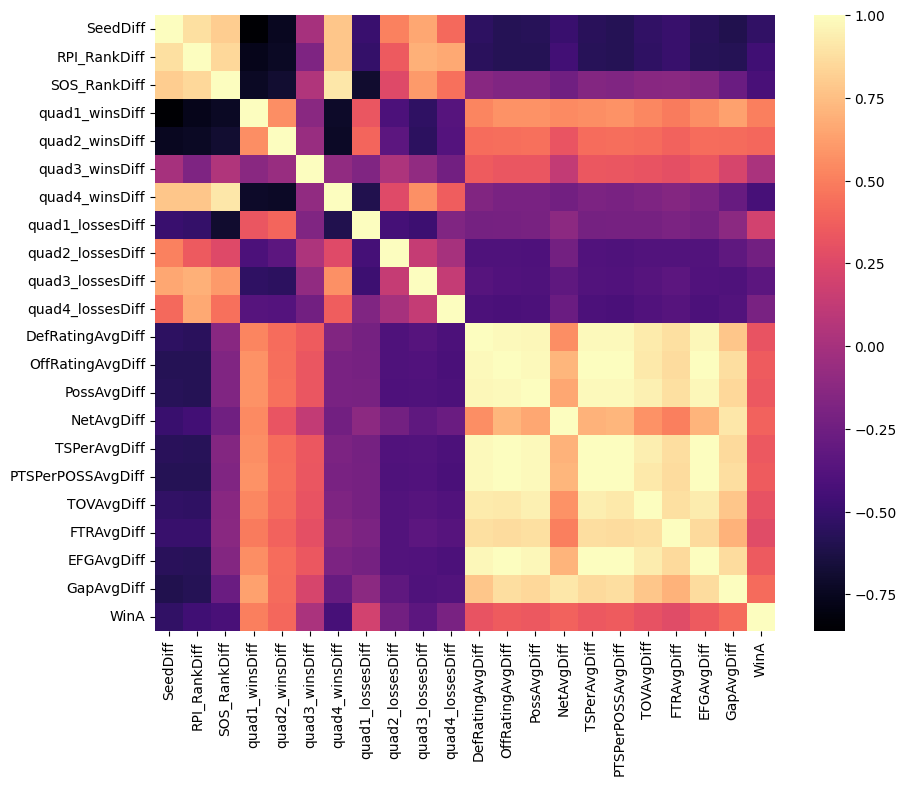

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
season_df_cm = df[['SeedDiff', 'RPI_RankDiff', 'SOS_RankDiff', 'quad1_winsDiff', 'quad2_winsDiff', 'quad3_winsDiff', 'quad4_winsDiff',
                   'quad1_lossesDiff', 'quad2_lossesDiff', 'quad3_lossesDiff', 'quad4_lossesDiff', 'DefRatingAvgDiff',
                   'OffRatingAvgDiff', 'PossAvgDiff', 'NetAvgDiff', 'TSPerAvgDiff', 'PTSPerPOSSAvgDiff', 'TOVAvgDiff', 'FTRAvgDiff',
                   'EFGAvgDiff', 'GapAvgDiff', 'WinA']].corr()

sns.heatmap(season_df_cm, cmap="magma")
plt.show()

## Feature Selection

In [ ]:
test_features = df[[
    "SeedDiff",
    "RPI_RankDiff",
    "SOS_RankDiff",
    "quad1_winsDiff",
    "quad2_winsDiff",
    "quad3_winsDiff",
    "quad4_winsDiff",
    "quad1_lossesDiff",
    "quad2_lossesDiff",
    "quad3_lossesDiff",
    "quad4_lossesDiff",
    "DefRatingAvgDiff",
    "OffRatingAvgDiff",
    "PossAvgDiff",
    "NetAvgDiff",
    "TSPerAvgDiff",
    "PTSPerPOSSAvgDiff",
    "TOVAvgDiff",
    "FTRAvgDiff",
    "EFGAvgDiff",
    "GapAvgDiff"
]]

test_label = df['WinA']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Copy features to avoid modifying original data
X = test_features.copy()

# Function to calculate VIF and remove highly correlated features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

# Initial VIF calculation
vif_df = calculate_vif(X)
print("Initial VIF Values:\n", vif_df)

Initial VIF Values:
               Feature          VIF
11   DefRatingAvgDiff          inf
14         NetAvgDiff          inf
16  PTSPerPOSSAvgDiff          inf
12   OffRatingAvgDiff          inf
15       TSPerAvgDiff  1168.271473
19         EFGAvgDiff   781.198507
13        PossAvgDiff    65.793284
7    quad1_lossesDiff    57.639293
1        RPI_RankDiff    41.822579
8    quad2_lossesDiff    32.133861
9    quad3_lossesDiff    27.661524
2        SOS_RankDiff    26.500274
6      quad4_winsDiff    25.381900
3      quad1_winsDiff    24.129602
17         TOVAvgDiff    20.552722
20         GapAvgDiff    20.072862
10   quad4_lossesDiff    16.440917
0            SeedDiff    11.335711
4      quad2_winsDiff    10.613897
18         FTRAvgDiff     8.150523
5      quad3_winsDiff     7.256729


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)

# Use RFE to rank features
selector = RFE(model, n_features_to_select=10)  # Select top 10 features
selector.fit(test_features, test_label)

# Display selected features
selected_features = test_features.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['SeedDiff', 'RPI_RankDiff', 'SOS_RankDiff', 'quad1_winsDiff',
       'quad4_winsDiff', 'NetAvgDiff', 'PTSPerPOSSAvgDiff', 'FTRAvgDiff',
       'EFGAvgDiff', 'GapAvgDiff'],
      dtype='object')


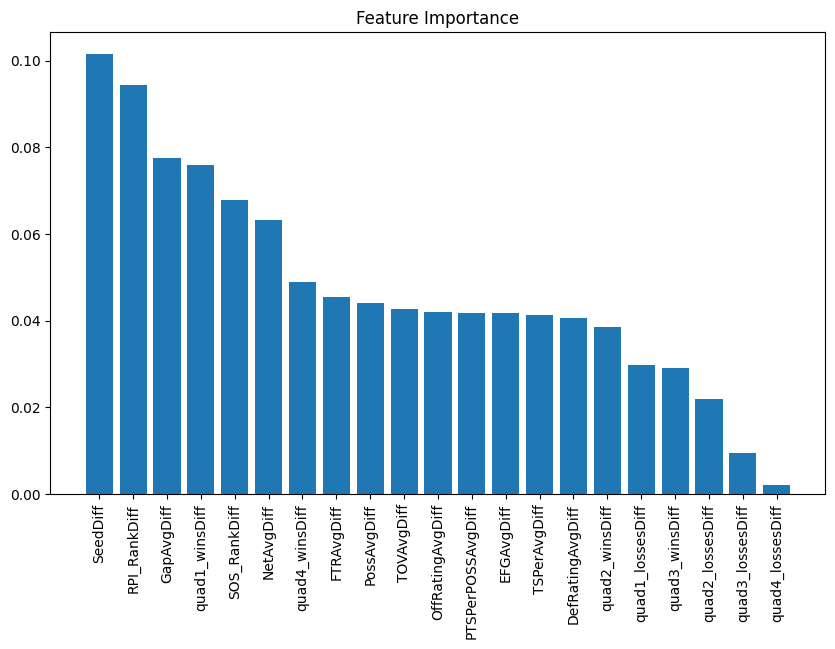

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(test_features, df['WinA'])

# Get feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(test_features.columns)), importances[indices], align="center")
plt.xticks(range(len(test_features.columns)), test_features.columns[indices], rotation=90)
plt.show()

In [ ]:
# Split data in X and y
X = df[[
    "RPI_RankDiff",
    "SOS_RankDiff",
    "quad1_winsDiff",
    "quad2_winsDiff",
    "quad4_winsDiff",
    "NetAvgDiff",
    "PTSPerPOSSAvgDiff",
    "FTRAvgDiff",
    "EFGAvgDiff",
    "GapAvgDiff",
    "PossAvgDiff"
]]
y = df[['WinA']]

In [ ]:
X.shape

(3656, 11)

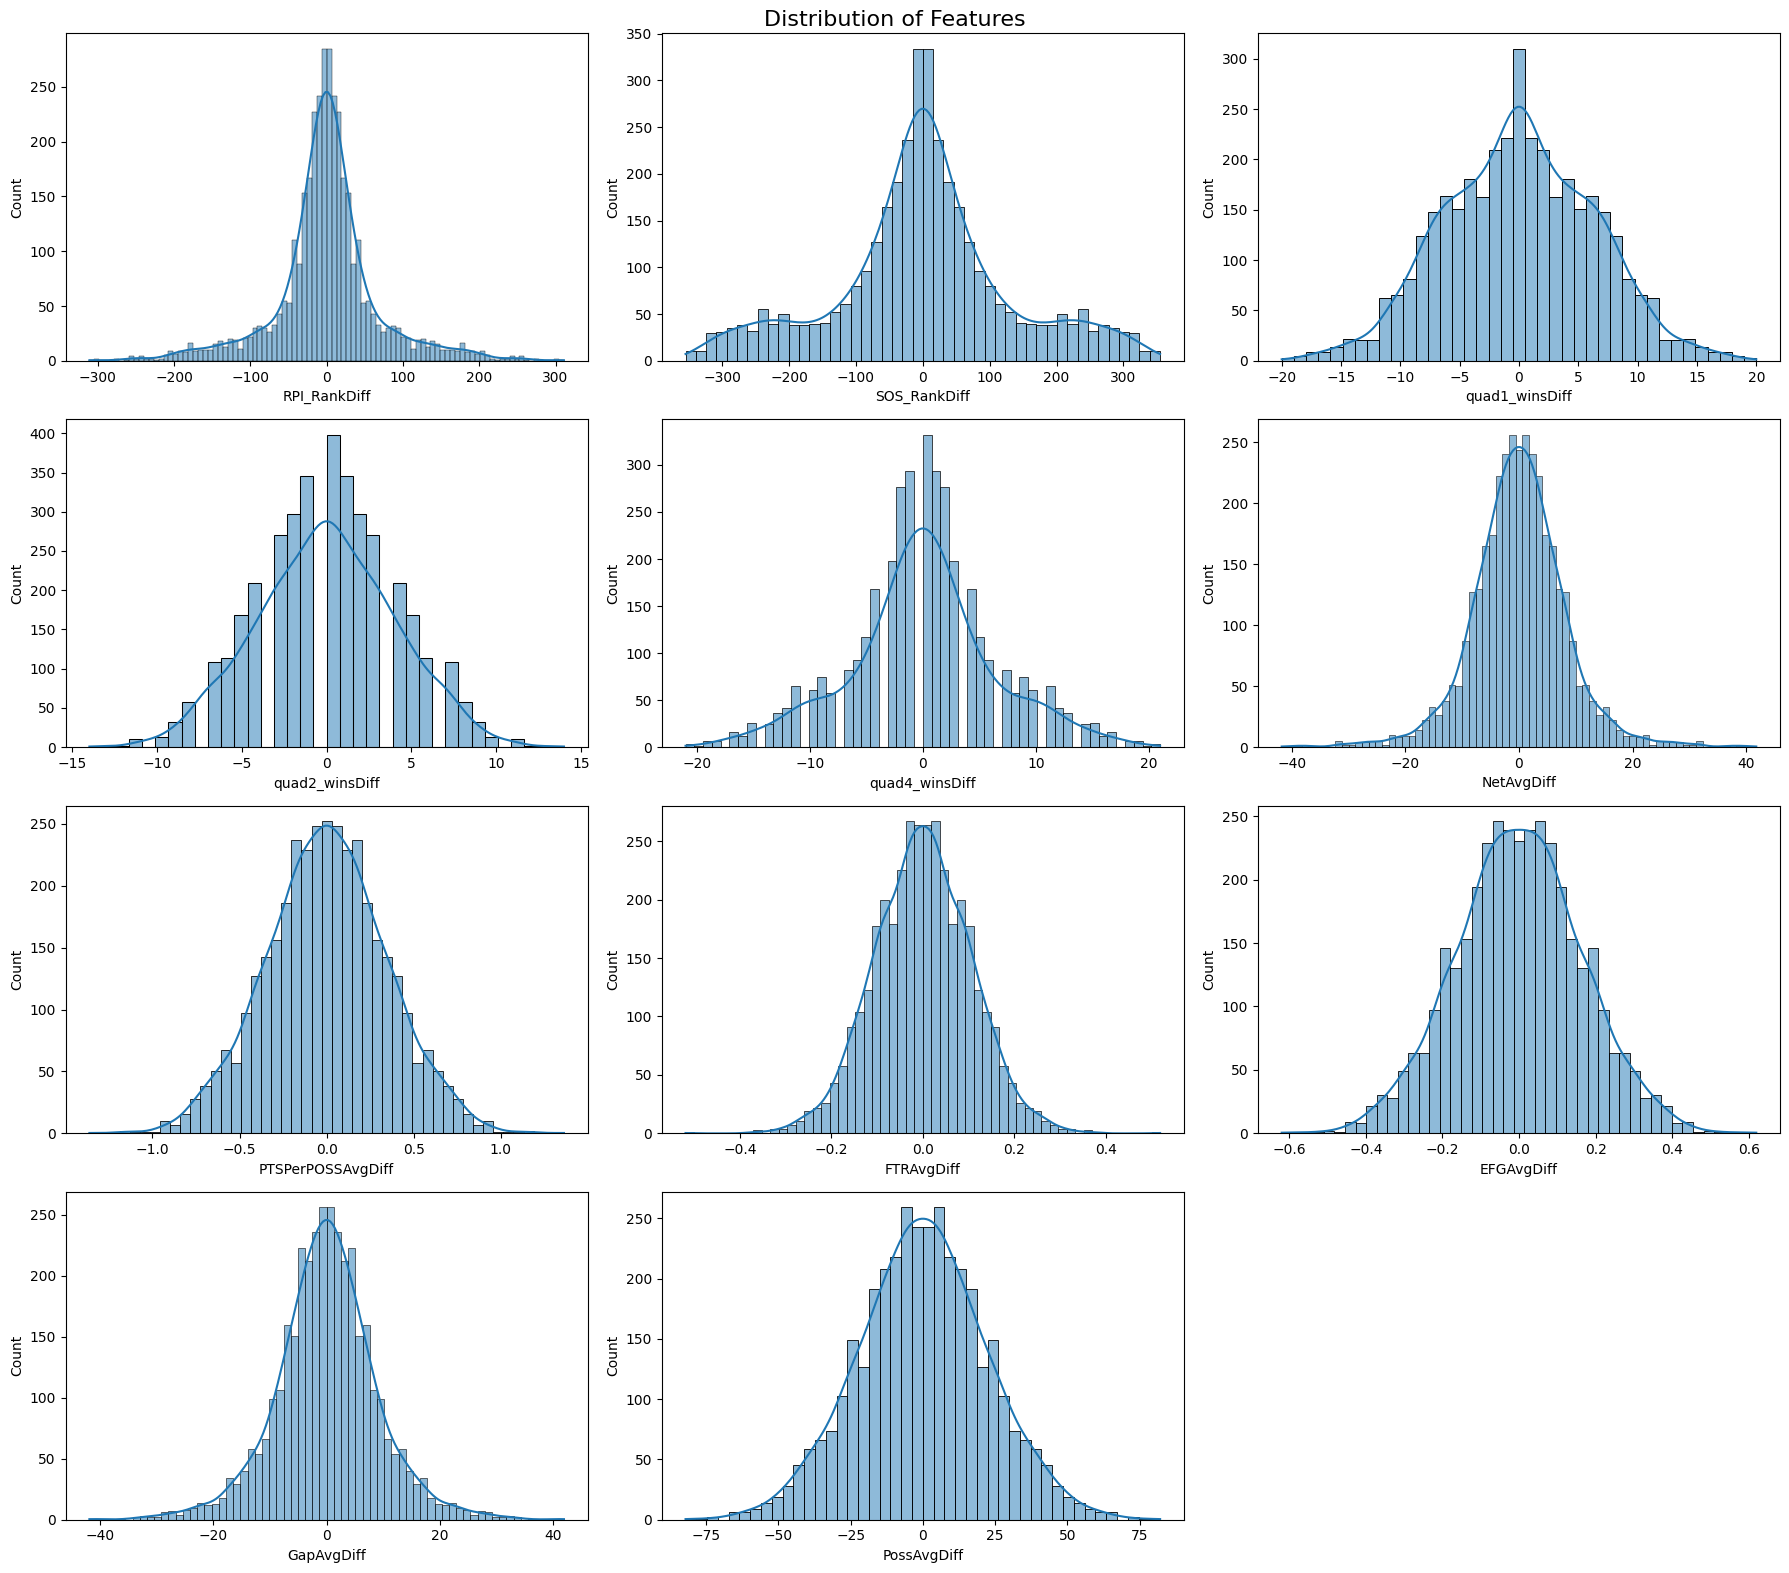

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Determine the number of features
num_features = X.shape[1]

# Set number of columns
num_cols = 3
num_rows = int(np.ceil(num_features / num_cols))  # Dynamically determine rows

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))

# Flatten axs if it's a multi-dimensional array
axs = axs.flatten()

# Plot each feature
for i, col in enumerate(X.columns):
    sns.histplot(data=X, x=col, ax=axs[i], kde=True)

# Remove empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Add title and adjust layout
fig.suptitle('Distribution of Features', fontsize=16)
fig.tight_layout()
plt.show()

## Standard Scaler + Split Test and Train Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


# Brier Score Loss

In [ ]:
import tensorflow.keras.backend as K

def brier_score_loss(y_true, y_pred):
    y_true = K.cast(y_true, dtype=tf.float32)
    return K.mean(K.square(y_true - y_pred))

# Models

In [ ]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# Keras Tuner
from keras_tuner.tuners import BayesianOptimization

## Dense Layers

In [ ]:
# Define the input shape
input_shape = (11,)

# Define the model architecture using best hyperparameters

inputs = tf.keras.layers.Input(shape=input_shape)
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(48, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.0)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compile the model with the brier_score_loss and Adam optimizer
model.compile(optimizer='adam', loss=brier_score_loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48)                  │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,241 (24.38 KB)

 Trainable params: 5,953 (23.25 KB)

 Non-trainable params: 288 (1.12 KB)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.6416 - auc: 0.6940 - loss: 0.2331 - precision: 0.6470 - recall: 0.6315 - val_accuracy: 0.7281 - val_auc: 0.8172 - val_loss: 0.1831 - val_precision: 0.7228 - val_recall: 0.7704
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7182 - auc: 0.8012 - loss: 0.1842 - precision: 0.7183 - recall: 0.7130 - val_accuracy: 0.7377 - val_auc: 0.8256 - val_loss: 0.1720 - val_precision: 0.7391 - val_recall: 0.7625
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7354 - auc: 0.8228 - loss: 0.1729 - precision: 0.7391 - recall: 0.7436 - val_accuracy: 0.7309 - val_auc: 0.8232 - val_loss: 0.1730 - val_precision: 0.7676 - val_recall: 0.6887
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7188 - auc: 0.8078 - loss: 0.1793 - precision: 0.7147 - recall: 0.7112 - val_accuracy: 0.7322 - val_auc: 0.8228 - val_loss: 0.1726 - val_precision: 0.7637 - val_recall: 0.6992
Epoch 5/100
92/92 ━━━━━━━━━━━━━

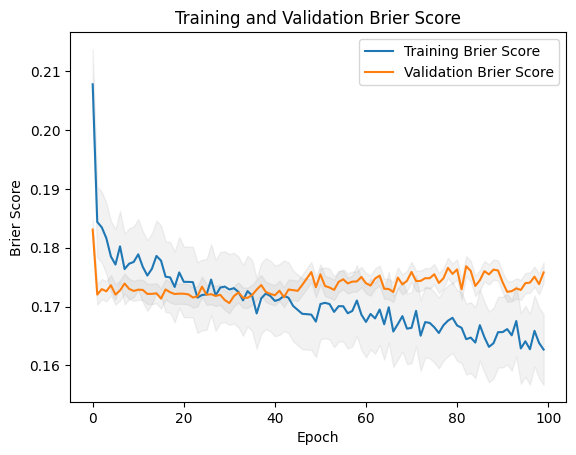

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Brier Score')
plt.plot(history.history['val_loss'], label='Validation Brier Score')
loss_std = np.std(history.history['loss'])
val_loss_std = np.std(history.history['val_loss'])

plt.fill_between(range(len(history.history['loss'])),
                 history.history['loss'] - loss_std,
                 history.history['loss'] + loss_std,
                 alpha=0.1, color='gray')
plt.fill_between(range(len(history.history['val_loss'])),
                 history.history['val_loss'] - val_loss_std,
                 history.history['val_loss'] + val_loss_std,
                 alpha=0.1, color='gray')
plt.title('Training and Validation Brier Score')
plt.xlabel('Epoch')
plt.ylabel('Brier Score')
plt.legend()
plt.show()

### Hyper Opt

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras.callbacks import TensorBoard

# Define the input shape
input_shape = (11,)

# Define the model architecture
def build_model(hp):
    inputs = keras.Input(shape=input_shape)
    x = layers.Dense(hp.Int('units_1', min_value=16, max_value=1024, step=32), activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.05))(x)
    x = layers.Dense(hp.Int('units_2', min_value=16, max_value=512, step=32), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.05))(x)
    x = layers.Dense(hp.Int('units_3', min_value=8, max_value=526, step=16), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(hp.Float('dropout_3', min_value=0.0, max_value=0.5, step=0.05))(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model with the brier_score_loss and Adam optimizer
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6])),
                  loss=brier_score_loss,
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    return model

# Define the hyperparameter search space
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=35,
    directory='my_dir',
    project_name='marchmadness_project_dense')

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='logs')

# Train the model with the Keras tuner
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test),
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=3), tensorboard_callback])

# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units_1')}")
print(f"The optimal number of units in the second densely-connected layer is {best_hps.get('units_2')}")
print(f"The optimal number of units in the third densely-connected layer is {best_hps.get('units_3')}")
print(f"The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}")
print(f"The optimal dropout rate for the first dropout layer is {best_hps.get('dropout_1')}")
print(f"The optimal dropout rate for the second dropout layer is {best_hps.get('dropout_2')}")
print(f"The optimal dropout rate for the third dropout layer is {best_hps.get('dropout_3')}")

Trial 35 Complete [00h 00m 09s]
val_loss: 0.24551333487033844

Best val_loss So Far: 0.1707468032836914
Total elapsed time: 00h 15m 08s
The optimal number of units in the first densely-connected layer is 208
The optimal number of units in the second densely-connected layer is 80
The optimal number of units in the third densely-connected layer is 8
The optimal learning rate for the optimizer is 0.01
The optimal dropout rate for the first dropout layer is 0.15000000000000002
The optimal dropout rate for the second dropout layer is 0.30000000000000004
The optimal dropout rate for the third dropout layer is 0.45


## Conv 1D

In [ ]:
import tensorflow as tf

# Define the input shape
input_shape = (11, 1)

# Define the model architecture
inputs = tf.keras.layers.Input(shape=input_shape)
x = tf.keras.layers.Conv1D(64, 3, activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Conv1D(32, 3, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compile the model with the custom loss function
model.compile(optimizer='adam', loss=brier_score_loss)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 11, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 9, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 9, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 7, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          14,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,537 (84.13 KB)

 Trainable params: 21,217 (82.88 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2389 - val_loss: 0.1950
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2074 - val_loss: 0.1931
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1921 - val_loss: 0.1829
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1901 - val_loss: 0.1786
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1931 - val_loss: 0.1755
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1828 - val_loss: 0.1726
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1846 - val_loss: 0.1733
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1808 - val_loss: 0.1724
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1764 - val_loss: 0.1720
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1811 - val_loss: 0.1719
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1803 - val_loss: 0.1707
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

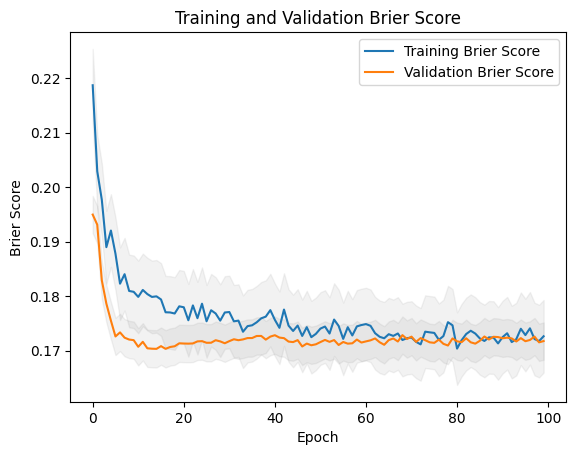

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Brier Score')
plt.plot(history.history['val_loss'], label='Validation Brier Score')
loss_std = np.std(history.history['loss'])
val_loss_std = np.std(history.history['val_loss'])

plt.fill_between(range(len(history.history['loss'])),
                 history.history['loss'] - loss_std,
                 history.history['loss'] + loss_std,
                 alpha=0.1, color='gray')
plt.fill_between(range(len(history.history['val_loss'])),
                 history.history['val_loss'] - val_loss_std,
                 history.history['val_loss'] + val_loss_std,
                 alpha=0.1, color='gray')
plt.title('Training and Validation Brier Score')
plt.xlabel('Epoch')
plt.ylabel('Brier Score')
plt.legend()
plt.show()

### Hyper Opt

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2

# Define the input shape
input_shape = (11, 1)

# Define the model architecture
def build_model(hp):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # First Conv1D Layer
    x = tf.keras.layers.Conv1D(
        filters=hp.Int('num_units_1', min_value=8, max_value=512, step=8),
        kernel_size=3,
        padding='same',
        activation=None,
        kernel_regularizer=l2(0.01)
    )(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.05))(x)

    # Second Conv1D Layer
    x = tf.keras.layers.Conv1D(
        filters=hp.Int('num_units_2', min_value=8, max_value=256, step=8),
        kernel_size=3,
        padding='same',
        activation=None,
        kernel_regularizer=l2(0.01)
    )(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.05))(x)

    x = tf.keras.layers.Flatten()(x)

    # Dense Layer
    x = tf.keras.layers.Dense(
        hp.Int('num_units_3', min_value=8, max_value=128, step=8),
        activation=None
    )(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    # Dropout for Regularization
    x = tf.keras.layers.Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1))(x)

    # Output Layer
    outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

    # Define Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compile Model
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
        ),
        loss=brier_score_loss,
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
    )

    return model

# Define Hyperparameter Search Space
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=50,
    directory='my_dir',
    project_name='marchmadness_project_conv'
)

# Define TensorBoard Callback
tensorboard_callback = TensorBoard(log_dir='logs')

# Ensure X_train, y_train, X_test, y_test are properly defined before running this
tuner.search(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3), tensorboard_callback]
)

# Print Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=2)[0]
print(f"The optimal number of units in the first Conv1D layer is {best_hps.get('num_units_1')}")
print(f"The optimal number of units in the second Conv1D layer is {best_hps.get('num_units_2')}")
print(f"The optimal number of units in the Dense layer is {best_hps.get('num_units_3')}")
print(f"The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}")
print(f"The optimal dropout rate for the first dropout layer is {best_hps.get('dropout_1')}")
print(f"The optimal dropout rate for the second dropout layer is {best_hps.get('dropout_2')}")
print(f"The optimal dropout rate for the Dense dropout layer is {best_hps.get('dropout_3')}")


Trial 50 Complete [00h 01m 36s]
val_loss: 0.184553325176239

Best val_loss So Far: 0.17509497702121735
Total elapsed time: 01h 01m 53s
The optimal number of units in the first Conv1D layer is 64
The optimal number of units in the second Conv1D layer is 16
The optimal number of units in the Dense layer is 32
The optimal learning rate for the optimizer is 0.001
The optimal dropout rate for the first dropout layer is 0.25
The optimal dropout rate for the second dropout layer is 0.35000000000000003
The optimal dropout rate for the Dense dropout layer is 0.4


## Random Forest

### Hyper Opt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from tqdm import tqdm
import time

# Define the function to build the model
def build_rf_model(hp):
    model = RandomForestClassifier(
        n_estimators=hp.Int('n_estimators', min_value=100, max_value=500, step=50),
        criterion=hp.Choice('criterion', ['gini', 'entropy', 'log_loss']),
        max_depth=hp.Int('max_depth', min_value=1, max_value=10, step=1),
        min_samples_split=hp.Int('min_samples_split', min_value=2, max_value=10, step=1),
        random_state=42
    )
    return model

# Define hyperparameter search space (only the first six parameters)
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Define the number of iterations
n_iter_search = 35  # Adjust as needed

# Start time tracking
start_time = time.time()

# Initialize tqdm progress bar
with tqdm(total=n_iter_search, desc="Hyperparameter Search Progress") as pbar:
    # Randomized search
    random_search = RandomizedSearchCV(
        rf,
        param_distributions=param_dist,
        n_iter=n_iter_search,
        cv=5,
        verbose=0,
        n_jobs=-1
    )

    # Perform search
    random_search.fit(X_train, y_train)

    # Update tqdm progress bar
    pbar.update(n_iter_search)

# End time tracking
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = random_search.best_params_

# Display results
print(f"\nSearch completed in {elapsed_time:.2f} seconds")
print(f"The optimal number of estimators is {best_hps['n_estimators']}")
print(f"The optimal criterion is {best_hps['criterion']}")
print(f"The optimal max_depth is {best_hps['max_depth']}")
print(f"The optimal min_samples_split is {best_hps['min_samples_split']}")

Hyperparameter Search Progress:   0%|          | 0/35 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
Hyperparameter Search Progress: 100%|██████████| 35/35 [04:35<00:00,  7.87s/it]


Search completed in 275.44 seconds
The optimal number of estimators is 200
The optimal criterion is log_loss
The optimal max_depth is 5
The optimal min_samples_split is 9


# Final Tests

In [ ]:
features = [
    "RPI_RankDiff",
    "SOS_RankDiff",
    "quad1_winsDiff",
    "quad2_winsDiff",
    "quad4_winsDiff",
    "NetAvgDiff",
    "PTSPerPOSSAvgDiff",
    "FTRAvgDiff",
    "EFGAvgDiff",
    "GapAvgDiff",
    "PossAvgDiff"
]

In [ ]:
from sklearn.preprocessing import StandardScaler

def rescale(features, df_train, df_val, df_test=None):
    scaler = StandardScaler()

    # Fit on training data and transform all sets
    df_train[features] = scaler.fit_transform(df_train[features])
    df_val[features] = scaler.transform(df_val[features])

    if df_test is not None:
        df_test[features] = scaler.transform(df_test[features])

    return df_train, df_val, df_test

## Dense Layers

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras.regularizers import l2
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error

def kfold_dense(df, df_test_=None, verbose=0, mode="reg"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    results = []  # Store detailed results
    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)  # Ensure features are normalized

        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)  # Use ElasticNet for regression
        else:
            # Define model architecture
            inputs = tf.keras.Input(shape=(df_train[features].shape[1],))
            x = tf.keras.layers.Dense(208, activation='relu')(inputs)
            x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.Dropout(0.25)(x)
            x = tf.keras.layers.Dense(80, activation='relu')(x)
            x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.Dropout(0.3)(x)
            x = tf.keras.layers.Dense(32, activation='relu')(x)
            x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.Dropout(0.45)(x)
            outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

            # Create the model
            model = Model(inputs=inputs, outputs=outputs)
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=brier_score_loss, metrics=['accuracy'])

        history = model.fit(df_train[features], df_train[target], validation_data=(df_val[features], df_val[target]), epochs=100, verbose=0)

        pred = model.predict(df_val[features])

        if df_test is not None:
            pred_test = model.predict(df_test[features])
            pred_tests.append(pred_test)

        pred = (pred - pred.min()) / (pred.max() - pred.min())
        pred = np.clip(pred, 0, 1)

        score = brier_score_loss(df_val['WinA'].values, pred)
        cvs.append(score)

        if verbose:
            print(f'\t -> Scored {score:.3f}')

    print(f'\n Local CV is {np.mean(cvs):.3f}')
    return pred_tests

In [ ]:
pred_tests_dense = kfold_dense(df, df_test, verbose=1, mode="cls")


Validating on season 2011
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step
	 -> Scored 0.401

Validating on season 2012
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
	 -> Scored 0.340

Validating on season 2013
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
	 -> Scored 0.351

Validating on season 2014
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
	 -> Scored 0.347

Validating on season 2015
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
	 -> Scored 0.338

Validating on season 2016
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
	 -> Scored 0.373

Validating on season 2017
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
	 -> Scored 0.349

Validating on season 2018
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
	 -> Scor

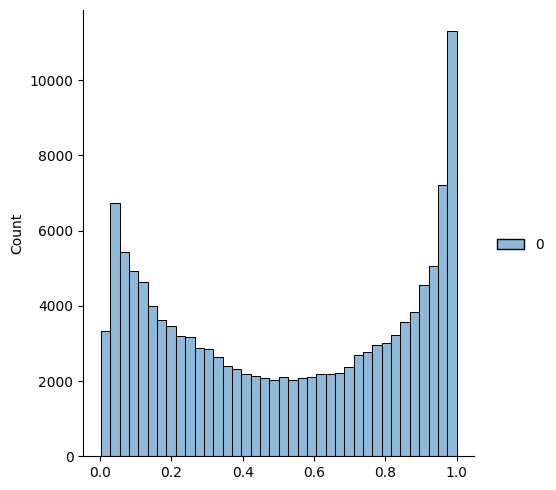

In [ ]:
pred_test_dense = np.mean(pred_tests_dense, 0)
df_test['pred'] = pred_test_dense

_ = sns.displot(pred_test_dense)

In [ ]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission_dense.csv', index=False)
final_sub.head(20)

,ID,pred
0,2025_1101_1102,0.515163
1,2025_1101_1103,0.089991
2,2025_1101_1104,0.027560
3,2025_1101_1105,0.846580
4,2025_1101_1106,0.704558
5,2025_1101_1107,0.397705
6,2025_1101_1108,0.834740
7,2025_1101_1110,0.313235
8,2025_1101_1111,0.267681
9,2025_1101_1112,0.037052


## Conv 1D

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras.regularizers import l2
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error

def kfold_conv(df, df_test_=None, verbose=0, mode="reg"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    results = []  # Store detailed results
    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)  # Ensure features are normalized

        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)  # Use ElasticNet for regression
        else:
            # Define model architecture
            inputs = Input(shape=(df_train[features].shape[1], 1))  # 3D input for Conv1D
            x = Conv1D(64, 3, activation=None, padding='same', kernel_regularizer=l2(0.01))(inputs)
            x = BatchNormalization()(x)
            x = tf.keras.layers.ReLU()(x)
            x = Dropout(0.15)(x)
            x = Conv1D(16, 3, activation=None, padding='same', kernel_regularizer=l2(0.01))(x)
            x = BatchNormalization()(x)
            x = tf.keras.layers.ReLU()(x)
            x = Dropout(0.35)(x)
            x = Flatten()(x)
            x = Dense(80, activation=None)(x)
            x = BatchNormalization()(x)
            x = tf.keras.layers.ReLU()(x)
            x = Dropout(0.4)(x)
            outputs = Dense(1, activation='sigmoid')(x)

            model = Model(inputs=inputs, outputs=outputs)
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=brier_score_loss, metrics=['accuracy'])


        # Reshape inputs to fit Conv1D: (samples, time_steps, channels)
        X_train = df_train[features].values.reshape(-1, df_train[features].shape[1], 1)
        X_val = df_val[features].values.reshape(-1, df_val[features].shape[1], 1)

        # Train the model
        history = model.fit(X_train, df_train[target].values,
                            validation_data=(X_val, df_val[target].values),
                            epochs=100, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss")])

        # Predict on validation set
        pred = model.predict(X_val).flatten()

        # If test set exists, predict on it as well
        if df_test is not None:
            X_test = df_test[features].values.reshape(-1, df_test[features].shape[1], 1)
            pred_test = model.predict(X_test).flatten()
            pred_tests.append(pred_test)

        # Normalize predictions
        pred = (pred - pred.min()) / (pred.max() - pred.min())
        pred = np.clip(pred, 0, 1)

        # Calculate mean squared error
        score = brier_score_loss(df_val['WinA'].values, pred)
        cvs.append(score)

        # Store results
        results.append({"Season": season, "Score": score})

        if verbose:
            print(f'\t -> Scored {score:.3f}')

    # Final cross-validation score
    print(f'\nLocal CV is {np.mean(cvs):.3f}')

    # Return structured results
    results_df = pd.DataFrame(results)
    return pred_tests

In [ ]:
pred_tests_conv = kfold_conv(df, df_test, verbose=1, mode="cls")


Validating on season 2011
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
	 -> Scored 0.194

Validating on season 2012
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
	 -> Scored 0.180

Validating on season 2013
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
	 -> Scored 0.176

Validating on season 2014
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
	 -> Scored 0.166

Validating on season 2015
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
	 -> Scored 0.154

Validating on season 2016
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
	 -> Scored 0.174

Validating on season 2017
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
	 -> Scored 0.159

Validating on season 2018
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
	 -> Score

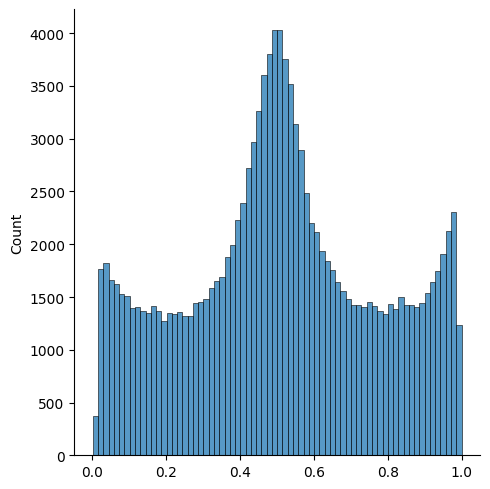

In [ ]:
pred_test_conv = np.mean(pred_tests_conv, 0)
df_test['pred'] = pred_test_conv

_ = sns.displot(pred_test_conv)

In [ ]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission_conv.csv', index=False)

## Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def kfold_log(df, df_test_=None, verbose=0):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    results = []  # Store detailed results
    target = "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy() if df_test_ is not None else None

        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)  # Ensure features are normalized

        # Define and train Logistic Regression model
        model = LogisticRegression(solver='liblinear', random_state=42)
        model.fit(df_train[features], df_train[target])

        # Predict probabilities on validation set
        pred = model.predict_proba(df_val[features])[:, 1]  # Probability of "win"

        # If test set exists, predict on it as well
        if df_test is not None:
            pred_test = model.predict_proba(df_test[features])[:, 1]
            pred_tests.append(pred_test)

        # Compute log loss as evaluation metric
        score = brier_score_loss(df_val[target].values, pred)
        cvs.append(score)

        # Store results
        results.append({"Season": season, "Score": score})

        if verbose:
            print(f'\t -> Scored {score:.3f}')

    # Final cross-validation score
    print(f'\nLocal CV is {np.mean(cvs):.3f}')

    # Return structured results
    results_df = pd.DataFrame(results)
    return pred_tests

In [ ]:
pred_tests_log = kfold_log(df, df_test, verbose=1)


Validating on season 2011
	 -> Scored 0.188

Validating on season 2012
	 -> Scored 0.167

Validating on season 2013
	 -> Scored 0.178

Validating on season 2014
	 -> Scored 0.165

Validating on season 2015
	 -> Scored 0.140

Validating on season 2016
	 -> Scored 0.172

Validating on season 2017
	 -> Scored 0.162

Validating on season 2018
	 -> Scored 0.184

Validating on season 2019
	 -> Scored 0.154

Validating on season 2021
	 -> Scored 0.199

Validating on season 2022
	 -> Scored 0.191

Validating on season 2023
	 -> Scored 0.197

Validating on season 2024
	 -> Scored 0.165

Local CV is 0.174


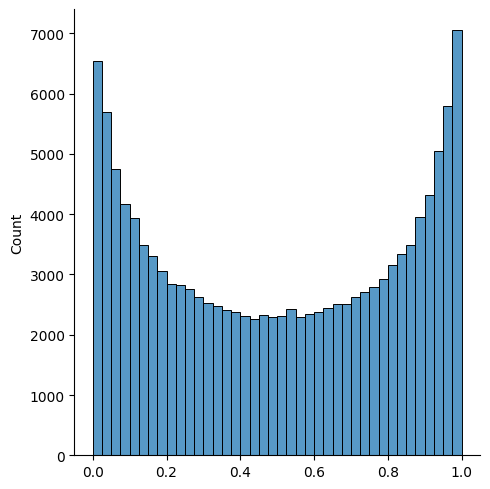

In [ ]:
pred_test_log = np.mean(pred_tests_log, 0)
df_test['pred'] = pred_test_log

_ = sns.displot(pred_test_log)

In [ ]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission_log.csv', index=False)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss

def kfold_rf(df, df_test_=None, verbose=0, mode="cls"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)

        # Random Forest Classifier for classification (binary classification)
        if mode == "reg":
            # Random Forest for regression (if needed)
            model = RandomForestClassifier(n_estimators=400, criterion='gini', random_state=42)
            # Fit the model
            model.fit(df_train[features], df_train[target])
            pred = model.predict(df_val[features])
            score = mean_squared_error(df_val[target], pred)
            cvs.append(score)
        else:
            # Random Forest Classifier for classification
            model = RandomForestClassifier(n_estimators=200, criterion='log_loss', max_depth=5, min_samples_split=9, random_state=42)
            # Fit the model
            model.fit(df_train[features], df_train[target])
            # Predict probabilities for the positive class
            pred = model.predict_proba(df_val[features])[:, 1]  # Probabilities for the positive class
            # Use Brier Score Loss for classification
            score = brier_score_loss(df_val[target], pred)
            cvs.append(score)

        # Predictions for the test set
        if df_test is not None:
            if mode == "reg":
                pred_test = model.predict(df_test[features])
            else:
                pred_test = model.predict_proba(df_test[features])[:, 1]
            pred_tests.append(pred_test)

        if verbose:
            print(f'\t -> Scored {score:.3f}')

    # Output the local cross-validation score
    print(f'\nLocal CV is {np.mean(cvs):.3f}')

    return pred_tests

In [ ]:
pred_tests_rf = kfold_rf(df, df_test, verbose=1, mode="cls")


Validating on season 2011
	 -> Scored 0.186

Validating on season 2012
	 -> Scored 0.170

Validating on season 2013
	 -> Scored 0.178

Validating on season 2014
	 -> Scored 0.164

Validating on season 2015
	 -> Scored 0.149

Validating on season 2016
	 -> Scored 0.179

Validating on season 2017
	 -> Scored 0.163

Validating on season 2018
	 -> Scored 0.183

Validating on season 2019
	 -> Scored 0.159

Validating on season 2021
	 -> Scored 0.197

Validating on season 2022
	 -> Scored 0.187

Validating on season 2023
	 -> Scored 0.201

Validating on season 2024
	 -> Scored 0.164

Local CV is 0.175


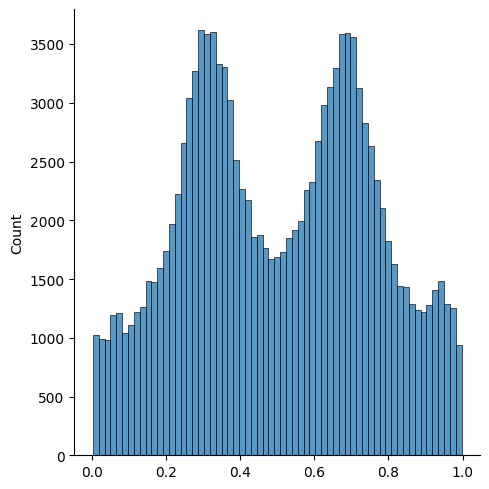

In [ ]:
pred_test_rf = np.mean(pred_tests_rf, 0)
df_test['pred'] = pred_test_rf

_ = sns.displot(pred_test_rf)

In [ ]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission_rf.csv', index=False)

## XgBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import brier_score_loss

def kfold_xgb(df, df_test_=None, verbose=0, mode="reg"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    results = []  # Store detailed results
    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)  # Ensure features are normalized

        params = {
            'objective': 'reg:squarederror' if mode == "reg" else 'binary:logistic',
            'eval_metric': 'logloss' if mode != "reg" else 'rmse',
            'learning_rate': 0.01,
            'max_depth': 6,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'alpha': 1,
            'lambda': 1,
            'random_state': 42
        }

        dtrain = xgb.DMatrix(df_train[features], label=df_train[target])
        dval = xgb.DMatrix(df_val[features], label=df_val[target])
        dtest = xgb.DMatrix(df_test[features]) if df_test is not None else None

        model = xgb.train(params, dtrain, num_boost_round=500, evals=[(dval, 'val')], early_stopping_rounds=50, verbose_eval=verbose)

        pred = model.predict(dval)

        if df_test is not None:
            pred_test = model.predict(dtest)
            pred_tests.append(pred_test)

        pred = (pred - pred.min()) / (pred.max() - pred.min())
        pred = np.clip(pred, 0, 1)

        score = brier_score_loss(df_val['WinA'].values, pred)
        cvs.append(score)

    print(f'\n Local CV is {np.mean(cvs):.3f}')
    return pred_tests




In [ ]:
pred_tests_xg = kfold_xgb(df, df_test, verbose=1, mode="cls")


Validating on season 2011
[0]	val-logloss:0.69129
[1]	val-logloss:0.68956
[2]	val-logloss:0.68743
[3]	val-logloss:0.68579
[4]	val-logloss:0.68361
[5]	val-logloss:0.68179
[6]	val-logloss:0.67990
[7]	val-logloss:0.67790
[8]	val-logloss:0.67589
[9]	val-logloss:0.67452
[10]	val-logloss:0.67274
[11]	val-logloss:0.67096
[12]	val-logloss:0.66912
[13]	val-logloss:0.66739
[14]	val-logloss:0.66590
[15]	val-logloss:0.66444
[16]	val-logloss:0.66300
[17]	val-logloss:0.66160
[18]	val-logloss:0.65985
[19]	val-logloss:0.65799
[20]	val-logloss:0.65668
[21]	val-logloss:0.65522
[22]	val-logloss:0.65363
[23]	val-logloss:0.65220
[24]	val-logloss:0.65031
[25]	val-logloss:0.64871
[26]	val-logloss:0.64743
[27]	val-logloss:0.64617
[28]	val-logloss:0.64488
[29]	val-logloss:0.64391
[30]	val-logloss:0.64245
[31]	val-logloss:0.64087
[32]	val-logloss:0.63975
[33]	val-logloss:0.63826
[34]	val-logloss:0.63729
[35]	val-logloss:0.63576
[36]	val-logloss:0.63426
[37]	val-logloss:0.63316
[38]	val-logloss:0.63190
[39]	val

In [ ]:
        if verbose:
            print(f'\t -> Scored {score:.3f}')

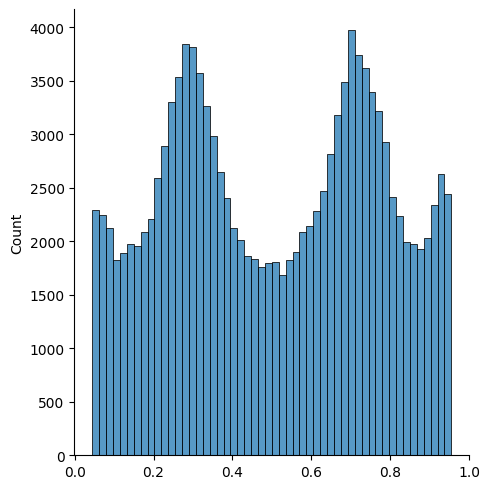

In [ ]:
pred_test_xg = np.mean(pred_tests_xg, 0)
df_test['pred'] = pred_test_xg

_ = sns.displot(pred_test_xg)

In [ ]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission_xgb.csv', index=False)

## XgBoost Optimized

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, brier_score_loss

# Define the parameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'alpha': [0, 0.5, 1, 10],
    'lambda': [0, 0.5, 1, 10]
}

def kfold_xgb_optimized(df, df_test_=None, verbose=0, mode="reg"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []

    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)

        X_train, y_train = df_train[features], df_train[target]
        X_val, y_val = df_val[features], df_val[target]

        # Define XGBoost model
        xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42) \
            if mode != "reg" else xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

        # Define the search
        random_search = RandomizedSearchCV(
            estimator=xgb_model,
            param_distributions=param_grid,
            n_iter=20,  # Number of random samples
            scoring=make_scorer(brier_score_loss, greater_is_better=False),
            cv=3,
            verbose=verbose,
            n_jobs=-1,
            random_state=42
        )

        # Run optimization
        random_search.fit(X_train, y_train)

        # Get best model parameters
        best_params = random_search.best_params_
        print(f"Best parameters for season {season}: {best_params}")

        # Extract 'n_estimators' and use it as num_boost_round
        num_boost_round = best_params.pop('n_estimators', 500)  # Default to 500 if missing
        best_model = xgb.train(best_params, xgb.DMatrix(X_train, label=y_train), num_boost_round=num_boost_round)

        # Validate
        pred = best_model.predict(xgb.DMatrix(X_val))
        pred = np.clip((pred - pred.min()) / (pred.max() - pred.min()), 0, 1)

        score = brier_score_loss(y_val, pred)
        cvs.append(score)

        if df_test is not None:
            pred_test = best_model.predict(xgb.DMatrix(df_test[features]))
            pred_tests.append(pred_test)

    print(f'\nOptimized Local CV is {np.mean(cvs):.3f}')
    return pred_tests



In [ ]:
pred_tests_xg_opt = kfold_xgb_optimized(df, df_test, verbose=1, mode="cls")


Validating on season 2011
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for season 2011: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.001, 'lambda': 1, 'colsample_bytree': 1.0, 'alpha': 0}

Validating on season 2012
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for season 2012: {'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 1, 'colsample_bytree': 0.8, 'alpha': 0.5}

Validating on season 2013
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for season 2013: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'lambda': 10, 'colsample_bytree': 0.6, 'alpha': 0}

Validating on season 2014
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for season 2014: {'subsample': 1.0, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'lambda': 1, 'colsample_bytree': 1.0, 'alph

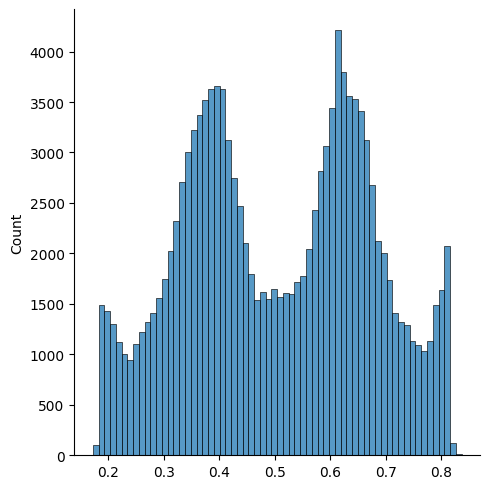

In [ ]:
pred_test_xg_opt = np.mean(pred_tests_xg_opt, 0)
df_test['pred'] = pred_test_xg_opt

_ = sns.displot(pred_test_xg_opt)

In [ ]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission_xgb_opt.csv', index=False)